<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Unsupervised-Learning/blob/main/ML2_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement: Amazon Customer Segmentation

As a data scientist at **Amazon**, you are given a dataset that has details about different customers with features like
- 'ID',
- 'n_clicks',
- 'n_visits', etc,

You are asked to segment these customers so that the **Amazon** can provide relevant and similar items to their customers, which will increase their overall sale.

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2023-12-05 11:28:10--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.101, 142.251.16.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vvkvsgllofalnqahssfj0hpb3be9o44f/1701775650000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=42ca4e38-33a7-4032-bce7-2e12148701fd [following]
--2023-12-05 11:28:11--  https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vvkvsgllofalnqahssfj0hpb3be9o44f/1701775650000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=42ca4e38-33a7-4032-bce7-2e12148701fd
Resolving doc-10-64-docs.googleusercontent.com (doc-10-64-docs.googleusercontent.com)... 172.253.63.132, 2607:

Let's look at the provided features in our dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

ID  n_clicks  n_visits  amount_spent  amount_discount  \
0  1476       130        65    213.905831        31.600751   
1  1535       543        46    639.223004         5.689175   
2  1807       520       102   1157.402763       844.321606   
3  1727       702        83   1195.903634       850.041757   
4  1324       221        84    180.754616        64.283300   

   days_since_registration  profile_information  
0                      233                  235  
1                      228                  170  
2                      247                  409  
3                      148                  200  
4                      243                  259

But first, Let's visualize if there are any patterns between two features.

**Q. which plot do you think can help us in identifying whether there is a cluster or not, with different pairs of variables?**

- Pairplot

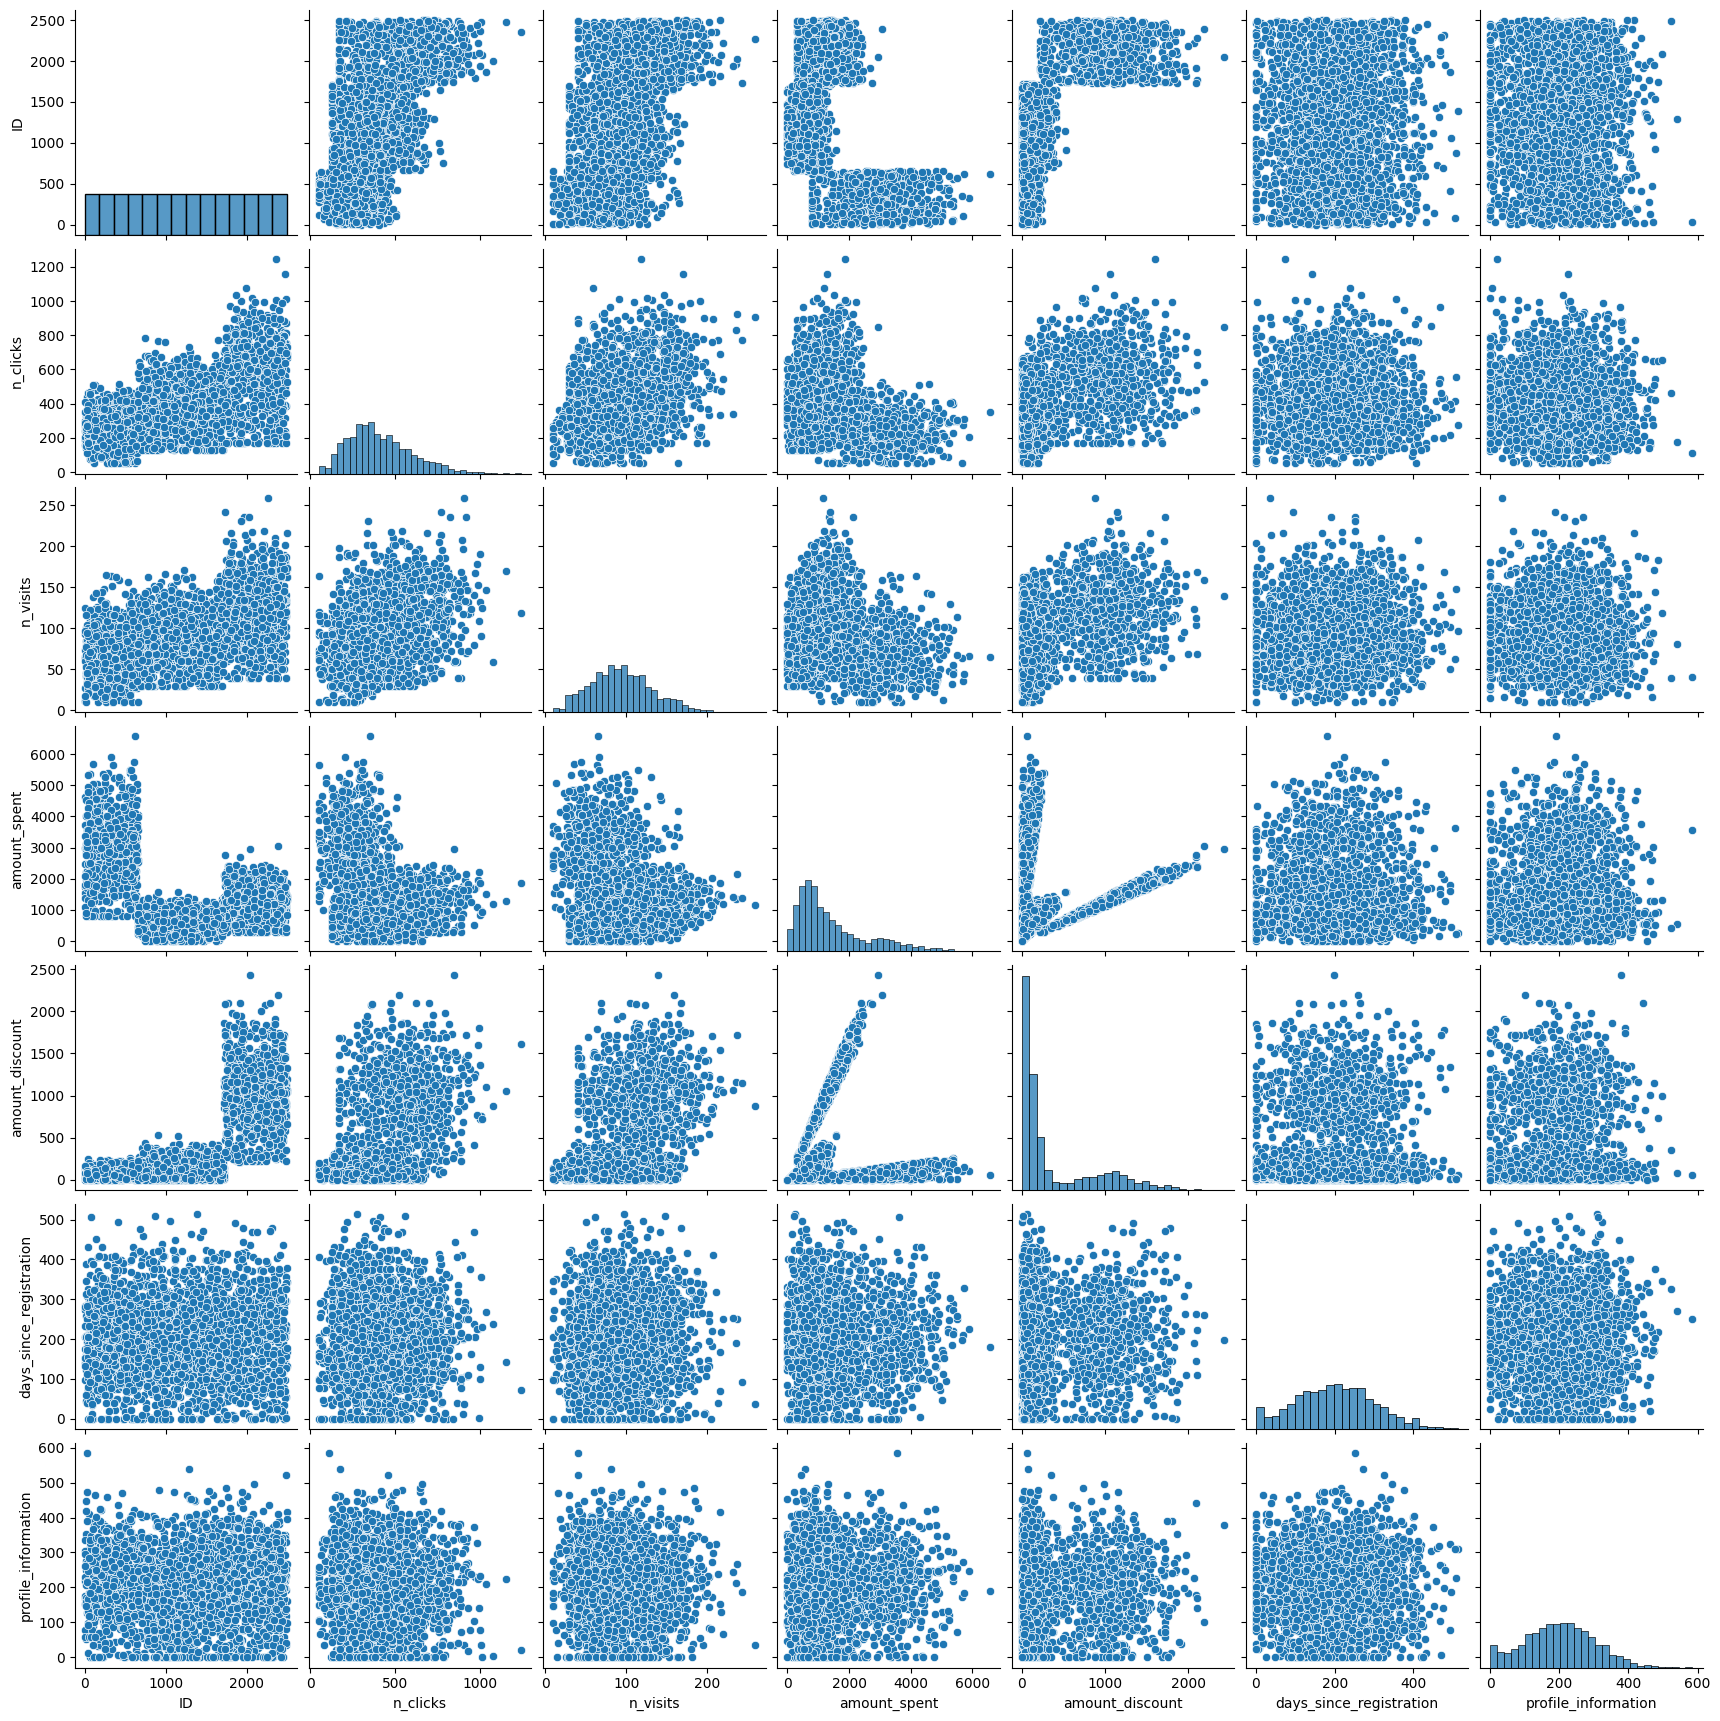

In [ ]:
sns.pairplot(df)

From pairplot, we can see:

- With multiple variables(dimensions), it is easier to identify patterns or if some data points are closer together forming cluster, using pairplot.

- Points that are closer together should have similar behaviour or characteristics.

#### **What could be the benefits of identifying patterns and groups in this data?**

If we can clearly distinguish these groups (segregate customers), the Amazon can:

- offer/show more discounted items to people who always buy discounted items

- show quality products to people who buy expensive products or buy more often,

- identify segment of customer who explore a lot but don't end up buying

**In the dataset we imported above, do you think variable 'ID' will be helpful for us while clustering using the same loss function we have defined?**

- No
- Euclidean distance is not the correct distance metric to use incase of categorical variable, as the euclidean distance between two instances of a categorical variable don't make sense.
- We shouldn't use categorical variable incase of K-means because the loss function we have defined in the objective is not suitable for a categorical variable, therefore let's drop it.


In [ ]:
X=df.drop("ID",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


### **Cleaning + Preprocessing**

**Some things to note about this data**

- CustomerID is just an identifier of the customer - its not a required parameter.
- No categorical variable, but we would have discarded that as well.
- No missing values.

In [ ]:
X.describe()

n_clicks     n_visits  amount_spent  amount_discount  \
count  2500.00000  2500.000000   2500.000000      2500.000000   
mean    408.68000    94.475600   1445.090745       388.508637   
std     186.41409    38.866356   1167.663473       487.143968   
min      50.00000    10.000000      0.000000         0.000000   
25%     274.75000    67.000000    609.618538        56.298615   
50%     378.00000    92.000000   1036.189112       137.454623   
75%     522.00000   119.000000   1949.270949       679.540536   
max    1246.00000   259.000000   6567.402267      2428.406527   

       days_since_registration  profile_information  
count              2500.000000          2500.000000  
mean                200.973600           201.040400  
std                  99.136618           100.139213  
min                   0.000000             0.000000  
25%                 130.000000           132.000000  
50%                 200.000000           201.000000  
75%                 268.000000           270.000000  
max                 514.000000           585.000000

### Feature Scaling
**Can you observe something about the ranges of the features?**

- Features are on different scales.

**Should we or should we not we scale the variables for K-means?**

- K-Means is a distance-based algorithm. Because of that, it’s really important to perform feature scaling (normalize, standardize, or choose any other option in which the distance has some comparable meaning for all the columns).

- For our use case, we can use MinMaxScaler instead of StandardScaler,  transforming the feature values to fall within the bounded intervals (min and max), rather than making them to fall around mean as 0 with standard deviation as 1 (StandardScaler).

- MinMaxScaler is an excellent tool for this purpose. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

Let's use K-means from scikit learn library.

In [ ]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let's try to see what did the Kmeans predict?
- It predicted the cluster labels for all the points.

In [ ]:
y_pred

array([2, 2, 1, ..., 3, 0, 1], dtype=int32)

We can even retrieve the coordinates of centroids of clusters.

In [ ]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.16763001, 0.23205394, 0.5132428 , 0.03436531, 0.378177  ,
        0.36612938],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573],
       [0.27330589, 0.32493667, 0.11230841, 0.06740043, 0.56620473,
        0.34602498],
       [0.28589783, 0.31533458, 0.10716208, 0.06305475, 0.2394147 ,
        0.33093295]])

### Visualizing clusters

Let's create a dataframe where we will add a new column 'label' which will consist of the cluster labels assigned by k-means, for visualization purpose.

In [ ]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  \
0  0.066890  0.220884      0.032571         0.013013                 0.453307   
1  0.412207  0.144578      0.097333         0.002343                 0.443580   
2  0.392977  0.369478      0.176234         0.347685                 0.480545   

   profile_information  label  
0             0.401709      2  
1             0.290598      2  
2             0.699145      1

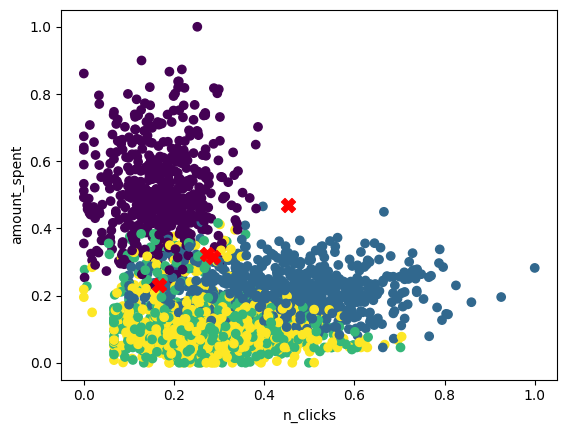

In [ ]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['amount_spent'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('n_clicks')
    plt.ylabel('amount_spent')

viz_clusters(kmeans)

- There is some distinction between clusters, but making sense out of this is a bit hard from this plot.

**A better alternative would be a line polar plot from plotly library - useful for visualizing multi-dimensional data**

- Group the customers by labels and calculate mean for all the features.
- Melt the data to have features on rows along with their corresponding mean values

In [ ]:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar.head(4)

label  variable     value
0      0  n_clicks  0.167630
1      1  n_clicks  0.453368
2      2  n_clicks  0.273382
3      3  n_clicks  0.285828

In [ ]:
import plotly.express as px

"""
  'polar' : customer dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()


The reason this plot is called polar because all the coordinates are polar coordinates (i.e. circular)

#### **Insights**

- **Polar plot is read and interpreted radially**

  - values increase as we move away from the center, showing the influence of a feature on that label.
  - <font color="green"> green(2) </font> and <font color="purple"> purple(3) </font> overlap on all the features except one.

Looking at this plot, we have different  customer segments:
- **Bargain shoppers**(`label 1`) - people who buy heavily discounted items. **Action:** show them more discounted items. They are also frequent users who have joined the website relatively recent.

- **Inactive old users** (`label 2`) - people who have been a long time user of the app but have not shown much interest now. **Action:** start sending notifications, emails, etc - get them back on the platform.

- **New and inactive users** (`label 3`)- Users who have recently joined but haven't bought much and are not that actively looking for items. Somewhat similar to `label 2`.

- **Premium shopper** (`label 0`) - Affluent customers who don't visit the website very often, not click much but spend a lot of money. **Action:** Show them more quality




**Q. Should we try with a different number of clusters?**

**Q. Does number of clusters affect the performance of the model?**

Lets find out with number of clusters as $3$, $4$, and $5$.



In [ ]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



KMeans(algorithm='full', init='random', n_init=1, random_state=0)

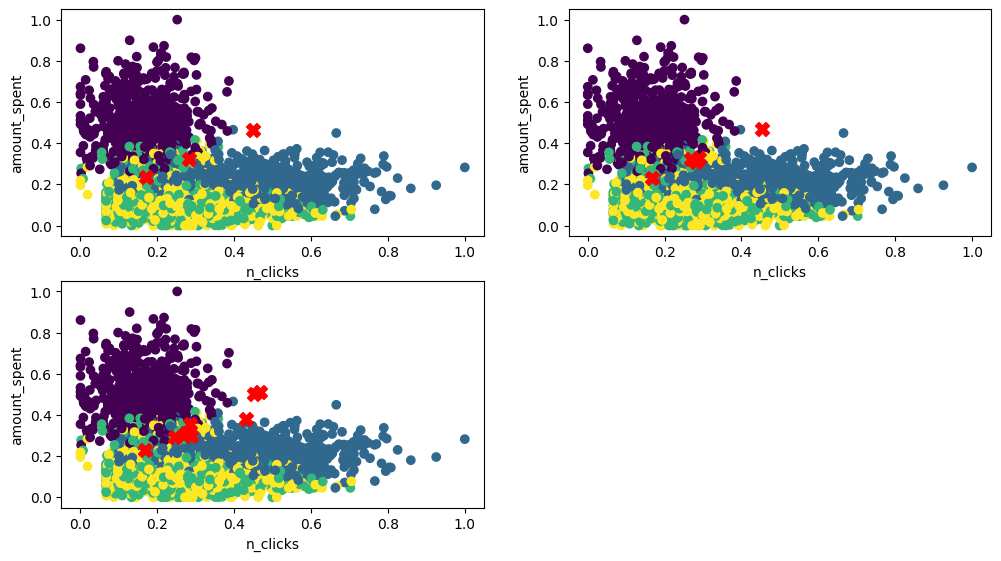

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(kmeans_iter1)

plt.subplot(322)
viz_clusters(kmeans_iter2)

plt.subplot(323)
viz_clusters(kmeans_iter3)

- So, Yes, the end results of K-Means depends on number of clusters.

**So, how many clusters are ideal? How to pick that?**
  - Using Inertia or WCSS

#### **How to select the best model?**

- To select the best model, we need a way to evaluate a K-Means model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets.

- But at least we can measure the distance between each instance and its centroid. This is the idea behind the **inertia metric**. The smaller the inertia value, the more coherent are the different clusters.

- The K-means algorithm aims to choose centroids that minimize the **inertia**, or **within-cluster sum-of-squares** criterion:

  - ${\sum_{i=0}^N min(||x_i - C_j||^2)}$ where;

    - N: No. of samples in dataset <br>
    - $x_i$ : Data Sample i <br>
    - $C_j$ : Centeroid of Cluster j



In [ ]:
kmeans_iter1.inertia_

280.16509626121075

In [ ]:
kmeans_iter3.inertia_

195.24159155451287

### **Let's experiment with different number of clusters and plot their Inertia**

- Calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of K
- Choose the K for which WCSS first starts to diminish.

**The steps can be summarized in the below steps:**
1. Perform K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.
4. The inflectionion point(elbow) in the plot is generally considered to be an indicator of the appropriate number of clusters.


In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

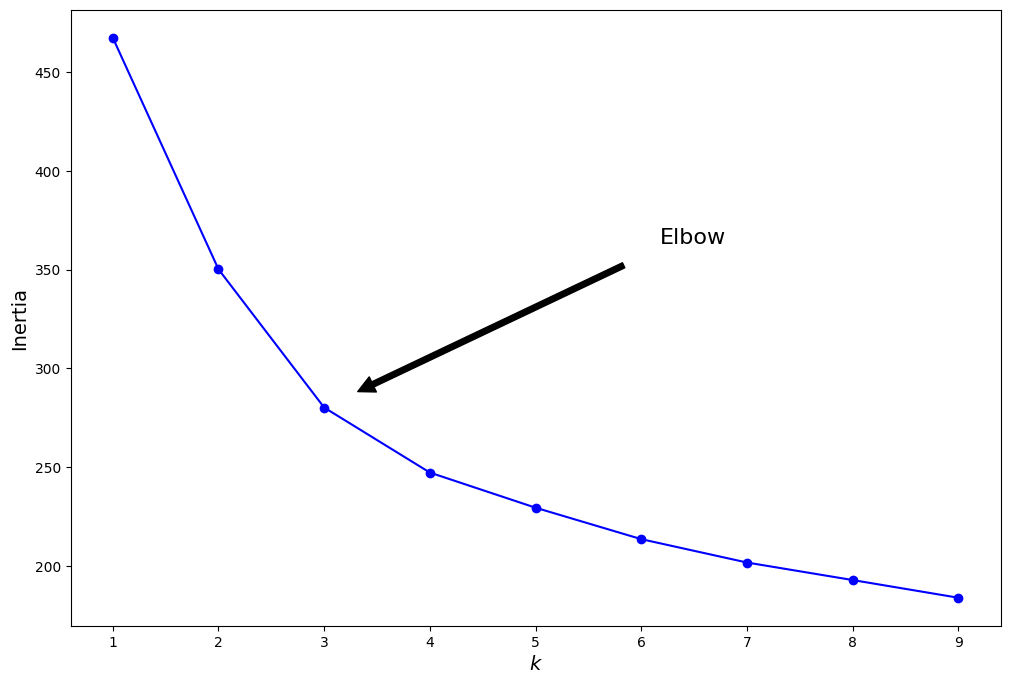

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

- Inflection point is near 3 or 4 where the drops sharply and then slows down
- 3 would be a good choice, any lower value would be dramatic, while any higher value would not help much.

  **The elbow is found when the dataset becomes flat or linear after applying the cluster analysis algorithm.**

But it's not a very precise method

- Elbow curve still relies on human interpretaion of where we see the slope changing.
- It gives a rough estimate only.

Let's try to evaluate the algorithm for different values of k using Silhouette scores.

In [ ]:
from sklearn.metrics import silhouette_score

## silhouette score for 4 clusters
silhouette_score(X, kmeans.labels_)

0.2108404992330738

In [ ]:
## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

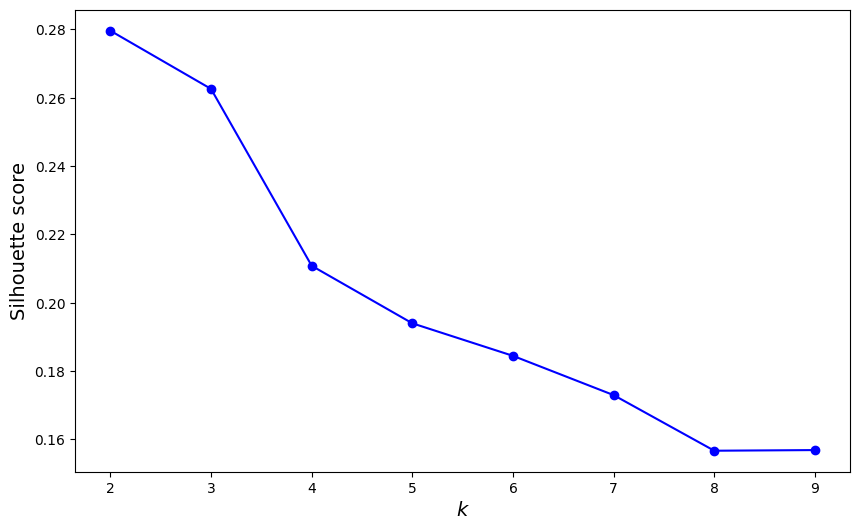

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

- We should pick 2 or 3 because after 3 there is a significant drop in the scores after 3.

- According to Elbow curve we wanted to pick 3 or 4, but according to Silhouette we can pick 2 or 3 therefore by taking common we can use 3.

- Even if we try to analyze the line polar curve, we can observe that the clusters 0 and 1 are quite the same except the difference in days after registration.

The strategy to pick 'K' should be:
1. Use the Silhouette score curve.
2. Use the elbow method.
3. Most importantly use the domain analysis.

The combination of the above 3 should be used for picking the right k.

**Note:** Silhouette Coefficient is only defined if number of labels is `2 <= n_labels <= n_samples - 1`.

In last class, we grouped the customers of Amazon. In this class, we have another interesting use-case. Let's jump into it.

## **Problem Statement: Building Stock Portfolios**

**Goal :** Creating pools of stocks that move together(similar characteristics) on one or more fundamental financial metric.

In previous lecture we studied about K-Means clustering and how we can use it for customer segmentation.

In today's lecture we'll study some other clustering techniques, why they are required, what are the limitations of K-Means, and we'll use all this knowledge to build stock portfolios.

Let's first have a look at the dataset that we'll be using.

#### **Dataset - Top 50 NSE stocks**

- Contains company's stock symbol
- Name, Industry and other details

Lets import the dependencies

In [ ]:
  import pandas as pd
  import numpy as np
  from matplotlib import pyplot as plt
  plt.rcParams["figure.figsize"] = (18,10)
  import seaborn as sns

Reading the data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb" -O ind_nifty50list.csv

--2023-12-05 11:47:35--  https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb
Resolving drive.google.com (drive.google.com)... 172.253.122.101, 172.253.122.138, 172.253.122.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lor2e82k513o17ceehrjj71a7p7kujcr/1701776850000/10306167880925931714/*/1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb?e=download&uuid=911343ca-787d-4b5d-9b3e-7d06eb92c8cf [following]
--2023-12-05 11:47:35--  https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lor2e82k513o17ceehrjj71a7p7kujcr/1701776850000/10306167880925931714/*/1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb?e=download&uuid=911343ca-787d-4b5d-9b3e-7d06eb92c8cf
Resolving doc-08-64-docs.googleusercontent.com (doc-08-64-docs.googleusercontent.com)... 172.253.63.132, 2

**Installing yfinance**


- **yfinance** is a library that helps us download market data from yahoo finance's api.

- So lets install these libraries into our environment using pip.

- You can read more about it <a href="https://pypi.org/project/yfinance/"> here </a>


In [ ]:
!pip install yfinance

In [ ]:
# Since yfinance is an old library, it also has some glitches, so we install this library as a fix
!pip install fix-yahoo-finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7073 sha256=1b09fea22339face647b9afcbc1156a59c90c2ace6d0121a11f2afc2f3df0da7
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix-yahoo-finance


#### EDA
#### **Importing Data**

- Purpose of this dataset: Getting list of Company names which are stored in the 'Symbol' column of the data

In [ ]:
stocks_df = pd.read_csv("./ind_nifty50list.csv")
list_of_symbols = list(stocks_df['Symbol'])
stocks_df.head()

Company Name            Industry      Symbol  \
0  Adani Ports and Special Economic Zone Ltd.            SERVICES  ADANIPORTS   
1                           Asian Paints Ltd.      CONSUMER GOODS  ASIANPAINT   
2                              Axis Bank Ltd.  FINANCIAL SERVICES    AXISBANK   
3                             Bajaj Auto Ltd.          AUTOMOBILE  BAJAJ-AUTO   
4                          Bajaj Finance Ltd.  FINANCIAL SERVICES  BAJFINANCE   

  Series     ISIN Code  
0     EQ  INE742F01042  
1     EQ  INE021A01026  
2     EQ  INE238A01034  
3     EQ  INE917I01010  
4     EQ  INE296A01024

**Now, we'll take symbols from original dataset**
- We'll add `.NS` at the end of every symbol to fetch data from Yahoo Finance based on company's symbol.

In [ ]:
yf_symbols = list(map(lambda x: x + '.NS', list_of_symbols))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

**Now, we'll define some variables and fetch the corresponding data from Yahoo Finance for the companies in our list**

In [ ]:
import yfinance as yf


stock_financials = {
    'marketCap': [],
    'regularMarketVolume': [],
    'earningsQuarterlyGrowth': [],
    'bookValue': [],
    'totalRevenue': [],
    'returnOnAssets': [],
    'profitMargins': [],
    'earningsGrowth': []
    }

for ticker in yf_symbols:
    stock_info = yf.Ticker(ticker).info
    stock_financials['marketCap'].append(stock_info.get('marketCap', None))
    stock_financials['regularMarketVolume'].append(stock_info.get('regularMarketVolume', None))
    stock_financials['earningsQuarterlyGrowth'].append(stock_info.get('earningsQuarterlyGrowth', None))
    stock_financials['bookValue'].append(stock_info.get('bookValue', None))
    stock_financials['totalRevenue'].append(stock_info.get('totalRevenue', None))
    stock_financials['returnOnAssets'].append(stock_info.get('returnOnAssets', None))
    stock_financials['profitMargins'].append(stock_info.get('profitMargins', None))
    stock_financials['earningsGrowth'].append(stock_info.get('earningsGrowth', None))

**Q. What have we collected?**
We 've collected attributes such as '**marketCap**', '**regularMarketVolume**' and others for companies that we collected in variable '**yf_symbols**'

In [ ]:
df = pd.DataFrame(stock_financials)
df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  bookValue  \
0  2188680888320             46551402                    0.042    225.380   
1  3093463826432              1005428                    0.540    172.706   
2  3492905746432             15804267                    0.105    462.233   
3  1738753572864               565798                    0.175   1036.725   
4  4538435108864              1522179                    0.277    989.308   

   totalRevenue  returnOnAssets  profitMargins  earningsGrowth  
0  234769793024         0.06029        0.26992           0.041  
1  350244601856         0.15803        0.14454           0.540  
2  595522813952         0.01024        0.22033           0.104  
3  403337510912         0.14867        0.16963           0.188  
4  287215910912         0.04705        0.45675           0.276

In [ ]:
df.shape

(50, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                50 non-null     int64  
 1   regularMarketVolume      50 non-null     int64  
 2   earningsQuarterlyGrowth  44 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             50 non-null     int64  
 5   returnOnAssets           46 non-null     float64
 6   profitMargins            50 non-null     float64
 7   earningsGrowth           44 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 3.2 KB


**Downloading stock price data**
- Purpose of this data: Getting returns of the stocks

In [ ]:
import yfinance as yf

stock_prices = yf.download(yf_symbols, start='2020-01-01')['Adj Close']
stock_prices.columns = list_of_symbols

[*********************100%%**********************]  50 of 50 completed


 - 'Adj Close' refers to Adjusted close which is used in stock market. It is the closing price after adjustments for all applicable splits and dividend distributions

In [ ]:
stock_prices.shape

(975, 50)

In [ ]:
stock_prices.tail()

ADANIPORTS   ASIANPAINT     AXISBANK   BAJAJ-AUTO   BAJFINANCE  \
Date                                                                          
2023-11-29   835.549988  3148.350098  1060.150024  6069.950195  1653.500000   
2023-11-30   825.500000  3119.899902  1074.250000  6090.549805  1673.500000   
2023-12-01   827.799988  3173.399902  1104.650024  6046.049805  1685.949951   
2023-12-04   878.650024  3194.550049  1125.599976  6201.700195  1696.250000   
2023-12-05  1013.099976  3226.250000  1132.449951  6140.100098  1692.699951   

             BAJAJFINSV         BPCL  BHARTIARTL    BRITANNIA        CIPLA  \
Date                                                                         
2023-11-29  7130.100098   995.400024  428.649994  4803.649902  1201.550049   
2023-11-30  7121.899902  1014.700012  435.700012  4852.649902  1212.300049   
2023-12-01  7259.350098  1014.700012  438.000000  4970.750000  1205.699951   
2023-12-04  7407.649902  1032.900024  461.500000  4937.750000  1216.500000   
2023-12-05  7349.799805  1031.099976  472.200012  4948.399902  1224.449951   

            ...    SUNPHARMA         TCS  TATACONSUM  TATAMOTORS    TATASTEEL  \
Date        ...                                                                 
2023-11-29  ...  1202.199951  933.549988  712.349976  127.750000  3513.750000   
2023-11-30  ...  1225.849976  940.750000  706.400024  127.900002  3487.600098   
2023-12-01  ...  1231.250000  942.849976  705.450012  130.000000  3511.649902   
2023-12-04  ...  1231.150024  946.650024  705.599976  131.000000  3512.449951   
2023-12-05  ...  1239.550049  950.049988  708.950012  131.600006  3531.600098   

                  TECHM        TITAN          UPL  ULTRACEMCO       WIPRO  
Date                                                                       
2023-11-29  1221.699951  3429.300049  8732.750000  570.049988  406.250000  
2023-11-30  1220.949951  3490.600098  9003.650391  570.650024  413.049988  
2023-12-01  1220.550049  3489.500000  9033.849609  575.150024  407.649994  
2023-12-04  1223.900024  3488.399902  9317.750000  578.900024  407.450012  
2023-12-05  1220.599976  3545.300049  9329.750000  581.400024  404.350006  

[5 rows x 50 columns]

In [ ]:
# splitting data by year - 2020 returns
price_2020 = stock_prices.loc["2020-01-02 00:00:00":"2020-12-31 00:00:00"]

# to see % growth of the stock: ((endDate/startDate) - 1) * 100
stock_prices.loc['returns_2020'] = (price_2020.loc['2020-08-04 00:00:00'] / price_2020.loc['2020-01-02 00:00:00'] - 1)*100

stock_prices

ADANIPORTS   ASIANPAINT     AXISBANK   BAJAJ-AUTO  \
Date                                                                      
2020-01-01 00:00:00   365.911560  1743.498413   746.799988  2640.764648   
2020-01-02 00:00:00   371.240601  1741.019165   755.029053  2616.369629   
2020-01-03 00:00:00   370.610809  1702.856934   741.064575  2575.334717   
2020-01-06 00:00:00   368.382263  1659.833740   721.414551  2546.496338   
2020-01-07 00:00:00   372.839264  1676.605469   723.908203  2546.748047   
...                          ...          ...          ...          ...   
2023-11-30 00:00:00   825.500000  3119.899902  1074.250000  6090.549805   
2023-12-01 00:00:00   827.799988  3173.399902  1104.650024  6046.049805   
2023-12-04 00:00:00   878.650024  3194.550049  1125.599976  6201.700195   
2023-12-05 00:00:00  1013.099976  3226.250000  1132.449951  6140.100098   
returns_2020          -16.891375    -3.813719   -43.305368    -0.566446   

                      BAJFINANCE   BAJAJFINSV         BPCL  BHARTIARTL  \
Date                                                                     
2020-01-01 00:00:00   935.770386  4163.675293   447.652771  389.949921   
2020-01-02 00:00:00   948.457336  4178.189453   449.529114  386.697968   
2020-01-03 00:00:00   932.517639  4126.430664   449.430359  383.485748   
2020-01-06 00:00:00   902.269775  3932.824707   444.048248  372.104095   
2020-01-07 00:00:00   907.553040  3943.599854   439.554962  365.639984   
...                          ...          ...          ...         ...   
2023-11-30 00:00:00  1673.500000  7121.899902  1014.700012  435.700012   
2023-12-01 00:00:00  1685.949951  7259.350098  1014.700012  438.000000   
2023-12-04 00:00:00  1696.250000  7407.649902  1032.900024  461.500000   
2023-12-05 00:00:00  1692.699951  7349.799805  1031.099976  472.200012   
returns_2020          -35.138667   -23.622263    20.606334  -11.615302   

                       BRITANNIA        CIPLA  ...    SUNPHARMA         TCS  \
Date                                           ...                            
2020-01-01 00:00:00  2787.020508   466.001099  ...   416.195679  313.626343   
2020-01-02 00:00:00  2799.627441   463.651001  ...   416.818604  313.142120   
2020-01-03 00:00:00  2786.241211   460.174866  ...   426.066376  308.154694   
2020-01-06 00:00:00  2770.883545   457.041412  ...   421.610199  302.247284   
2020-01-07 00:00:00  2784.224121   458.852936  ...   427.791321  304.958862   
...                          ...          ...  ...          ...         ...   
2023-11-30 00:00:00  4852.649902  1212.300049  ...  1225.849976  940.750000   
2023-12-01 00:00:00  4970.750000  1205.699951  ...  1231.250000  942.849976   
2023-12-04 00:00:00  4937.750000  1216.500000  ...  1231.150024  946.650024   
2023-12-05 00:00:00  4948.399902  1224.449951  ...  1239.550049  950.049988   
returns_2020           26.413121    51.151866  ...    22.489646   40.114341   

                     TATACONSUM  TATAMOTORS    TATASTEEL        TECHM  \
Date                                                                    
2020-01-01 00:00:00  183.876907   40.974754  2008.583374   642.186279   
2020-01-02 00:00:00  193.148010   42.472710  1999.363159   645.514709   
2020-01-03 00:00:00  190.506256   42.371967  2039.207886   653.140808   
2020-01-06 00:00:00  185.073181   41.456551  2039.022583   649.180359   
2020-01-07 00:00:00  184.126129   41.706215  2044.027222   654.826111   
...                         ...         ...          ...          ...   
2023-11-30 00:00:00  706.400024  127.900002  3487.600098  1220.949951   
2023-12-01 00:00:00  705.450012  130.000000  3511.649902  1220.550049   
2023-12-04 00:00:00  705.599976  131.000000  3512.449951  1223.900024   
2023-12-05 00:00:00  708.950012  131.600006  3531.600098  1220.599976   
returns_2020         -42.477418  -23.223683     5.812770   -12.938676   

                           TITAN          UPL  ULTRACEMCO       WIPRO  
Date                             

In [ ]:
stock_prices = stock_prices.transpose()
stock_prices.head()

Date        2020-01-01 00:00:00  2020-01-02 00:00:00  2020-01-03 00:00:00  \
ADANIPORTS           365.911560           371.240601           370.610809   
ASIANPAINT          1743.498413          1741.019165          1702.856934   
AXISBANK             746.799988           755.029053           741.064575   
BAJAJ-AUTO          2640.764648          2616.369629          2575.334717   
BAJFINANCE           935.770386           948.457336           932.517639   

Date        2020-01-06 00:00:00  2020-01-07 00:00:00  2020-01-08 00:00:00  \
ADANIPORTS           368.382263           372.839264           373.662872   
ASIANPAINT          1659.833740          1676.605469          1680.883423   
AXISBANK             721.414551           723.908203           722.661377   
BAJAJ-AUTO          2546.496338          2546.748047          2564.604004   
BAJFINANCE           902.269775           907.553040           912.526978   

Date        2020-01-09 00:00:00  2020-01-10 00:00:00  2020-01-13 00:00:00  \
ADANIPORTS           379.621674           379.863953           378.216797   
ASIANPAINT          1723.421021          1742.866577          1754.874146   
AXISBANK             740.964844           738.171997           735.528687   
BAJAJ-AUTO          2586.777344          2599.771240          2593.777344   
BAJFINANCE           937.446777           935.151794           943.433472   

Date        2020-01-14 00:00:00  ...  2023-11-22 00:00:00  \
ADANIPORTS           377.102539  ...           791.900024   
ASIANPAINT          1768.729370  ...          3133.000000   
AXISBANK             746.002014  ...           998.099976   
BAJAJ-AUTO          2600.106689  ...          5751.549805   
BAJFINANCE           953.371460  ...          1623.900024   

Date        2023-11-23 00:00:00  2023-11-24 00:00:00  2023-11-28 00:00:00  \
ADANIPORTS           793.099976           795.549988           837.700012   
ASIANPAINT          3122.949951          3136.149902          3148.350098   
AXISBANK             999.049988          1008.500000          1021.150024   
BAJAJ-AUTO          5925.250000          5930.299805          5998.149902   
BAJFINANCE          1623.949951          1617.250000          1654.400024   

Date        2023-11-29 00:00:00  2023-11-30 00:00:00  2023-12-01 00:00:00  \
ADANIPORTS           835.549988           825.500000           827.799988   
ASIANPAINT          3148.350098          3119.899902          3173.399902   
AXISBANK            1060.150024          1074.250000          1104.650024   
BAJAJ-AUTO          6069.950195          6090.549805          6046.049805   
BAJFINANCE          1653.500000          1673.500000          1685.949951   

Date        2023-12-04 00:00:00  2023-12-05 00:00:00  returns_2020  
ADANIPORTS           878.650024          1013.099976    -16.891375  
ASIANPAINT          3194.550049          3226.250000     -3.813719  
AXISBANK            1125.599976          1132.449951    -43.305368  
BAJAJ-AUTO          6201.700195          6140.100098     -0.566446  
BAJFINANCE          1696.250000          1692.699951    -35.138667  

[5 rows x 976 columns]

**Putting the data together**

In [ ]:
prices = stock_prices.iloc[:, -1]
df.index = stock_prices.index
df['return_2020'] = prices
df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  2188680888320             46551402                    0.042   
ASIANPAINT  3093463826432              1005428                    0.540   
AXISBANK    3492905746432             15804267                    0.105   
BAJAJ-AUTO  1738753572864               565798                    0.175   
BAJFINANCE  4538435108864              1522179                    0.277   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS    225.380  234769793024         0.06029        0.26992   
ASIANPAINT    172.706  350244601856         0.15803        0.14454   
AXISBANK      462.233  595522813952         0.01024        0.22033   
BAJAJ-AUTO   1036.725  403337510912         0.14867        0.16963   
BAJFINANCE    989.308  287215910912         0.04705        0.45675   

            earningsGrowth  return_2020  
ADANIPORTS           0.041   -16.891375  
ASIANPAINT           0.540    -3.813719  
AXISBANK             0.104   -43.305368  
BAJAJ-AUTO           0.188    -0.566446  
BAJFINANCE           0.276   -35.138667

**Checking for null values**

In [ ]:
df.isna().sum()

marketCap                  0
regularMarketVolume        0
earningsQuarterlyGrowth    6
bookValue                  1
totalRevenue               0
returnOnAssets             4
profitMargins              0
earningsGrowth             6
return_2020                1
dtype: int64

In [ ]:
df['returnOnAssets'] = df['returnOnAssets'].replace(np.nan, 0)

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(42, 9)

In [ ]:
df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  2188680888320             46551402                    0.042   
ASIANPAINT  3093463826432              1005428                    0.540   
AXISBANK    3492905746432             15804267                    0.105   
BAJAJ-AUTO  1738753572864               565798                    0.175   
BAJFINANCE  4538435108864              1522179                    0.277   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS    225.380  234769793024         0.06029        0.26992   
ASIANPAINT    172.706  350244601856         0.15803        0.14454   
AXISBANK      462.233  595522813952         0.01024        0.22033   
BAJAJ-AUTO   1036.725  403337510912         0.14867        0.16963   
BAJFINANCE    989.308  287215910912         0.04705        0.45675   

            earningsGrowth  return_2020  
ADANIPORTS           0.041   -16.891375  
ASIANPAINT           0.540    -3.813719  
AXISBANK             0.104   -43.305368  
BAJAJ-AUTO           0.188    -0.566446  
BAJFINANCE           0.276   -35.138667

**Q. Should we Scale the values?**

- The data seems to be in different scales
- Different financial metrics have different scales.
- We need to put them on the same scale.

We can use `StandardScaler` from `sklearn`

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [ ]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)

In [ ]:
scaled_df

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  -0.388733             3.058945                -0.517473   
ASIANPAINT  -0.094522            -0.569971                 0.841576   
AXISBANK     0.035365             0.609140                -0.345545   
BAJAJ-AUTO  -0.535037            -0.604999                -0.154514   
BAJFINANCE   0.375342            -0.528798                 0.123845   
BAJAJFINSV  -0.224417            -0.508372                 0.020143   
BHARTIARTL   0.864656            -0.310175                -1.655473   
BRITANNIA   -0.712855            -0.627736                -0.110850   
CIPLA       -0.778966            -0.480217                 0.552301   
COALINDIA   -0.387927             0.607411                -0.290965   
DIVISLAB    -0.777484            -0.614238                -1.437152   
DRREDDY     -0.787686            -0.632204                 0.268483   
EICHERMOT   -0.732184            -0.566749                 0.860680   
GRASIM      -0.656722            -0.605532                -0.214553   
HCLTECH      0.059721            -0.336800                -0.457435   
HDFCLIFE    -0.630022            -0.329184                -0.110850   
HEROMOTOCO  -0.853002            -0.593260                 0.628713   
HINDALCO    -0.740799            -0.140268                -0.643008   
HINDUNILVR   0.857948            -0.402444                -0.640279   
HDFC         0.544325             2.725393                -0.140869   
ICICIBANK    1.209900             1.849489                 0.353083   
ITC          0.731810             0.316658                -0.468351   
INDUSINDBK  -0.719545            -0.374716                -0.031709   
INFY         0.856367            -0.241945                -0.621176   
KOTAKBANK    0.081152            -0.206184                 0.011956   
LT           0.381461            -0.517886                 0.585049   
MARUTI      -0.004276            -0.603790                 3.289504   
NTPC        -0.200382             0.854326                 0.410392   
NESTLEIND   -0.328900            -0.644726                 0.347625   
ONGC        -0.273892             0.509669                 1.155413   
POWERGRID   -0.428130             2.593198                -0.533847   
RELIANCE     4.262991            -0.144564                 0.115658   
SBILIFE     -0.624773            -0.496095                -0.607531   
SHREECEM    -0.771878            -0.648431                 3.286775   
SBIN         0.664732             2.251920                -0.383752   
SUNPHARMA   -0.133340            -0.576011                -0.495641   
TCS          3.101545            -0.540337                -0.394668   
TATACONSUM  -0.813436            -0.586930                -0.547493   
TECHM       -0.713046            -0.530600                -2.313166   
TITAN       -0.074410            -0.593233                -0.356461   
ULTRACEMCO  -0.226215            -0.614348                 1.267303   
WIPRO       -0.414739            -0.205407                -0.645737   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS  -0.436242     -0.545191       -0.237950       1.139351   
ASIANPAINT  -0.494960     -0.471767        1.471393      -0.145937   
AXISBANK    -0.172211     -0.315810       -1.113258       0.630997   
BAJAJ-AUTO   0.468201     -0.438009        1.307699       0.111264   
BAJFINANCE   0.415343     -0.511843       -0.469500       3.054572   
BAJAJFINSV  -0.331751     -0.101116       -0.382756      -0.812262   
BHARTIARTL  -0.535439      0.235747       -0.323819      -1.098781   
BRITANNIA   -0.555595     -0.588888        2.531207      -0.061878   
CIPLA       -0.344697     -0.539699        0.478211      -0.173308   
COALINDIA   -0.561475      0.203757        0.354741       0.408547   
DIVISLAB    -0.155111     -0.647760       -0.095592       0.230382   
DRREDDY      1.007112     -0.524790        0.908258       0.327256   
EICHERMOT   -0.038638     -0.595857        0.563

#### Performing Agglomerative Clustering


In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

In [ ]:
Z.shape

(41, 4)

In [ ]:
Z

array([[15.        , 32.        ,  0.77922048,  2.        ],
       [35.        , 41.        ,  0.88636062,  2.        ],
       [ 0.        , 30.        ,  0.96375042,  2.        ],
       [18.        , 23.        ,  0.97844033,  2.        ],
       [22.        , 24.        ,  1.18430109,  2.        ],
       [ 5.        , 39.        ,  1.20337308,  2.        ],
       [14.        , 43.        ,  1.29692692,  3.        ],
       [ 1.        , 12.        ,  1.49803141,  2.        ],
       [19.        , 34.        ,  1.52346723,  2.        ],
       [16.        , 49.        ,  1.5961426 ,  3.        ],
       [ 8.        , 11.        ,  1.61743363,  2.        ],
       [37.        , 47.        ,  1.62964605,  3.        ],
       [ 2.        ,  9.        ,  1.71102505,  2.        ],
       [13.        , 42.        ,  1.73725384,  3.        ],
       [17.        , 55.        ,  1.81980075,  4.        ],
       [ 3.        , 51.        ,  1.83151783,  4.        ],
       [25.        , 28.

Text(0, 0.5, 'distance')

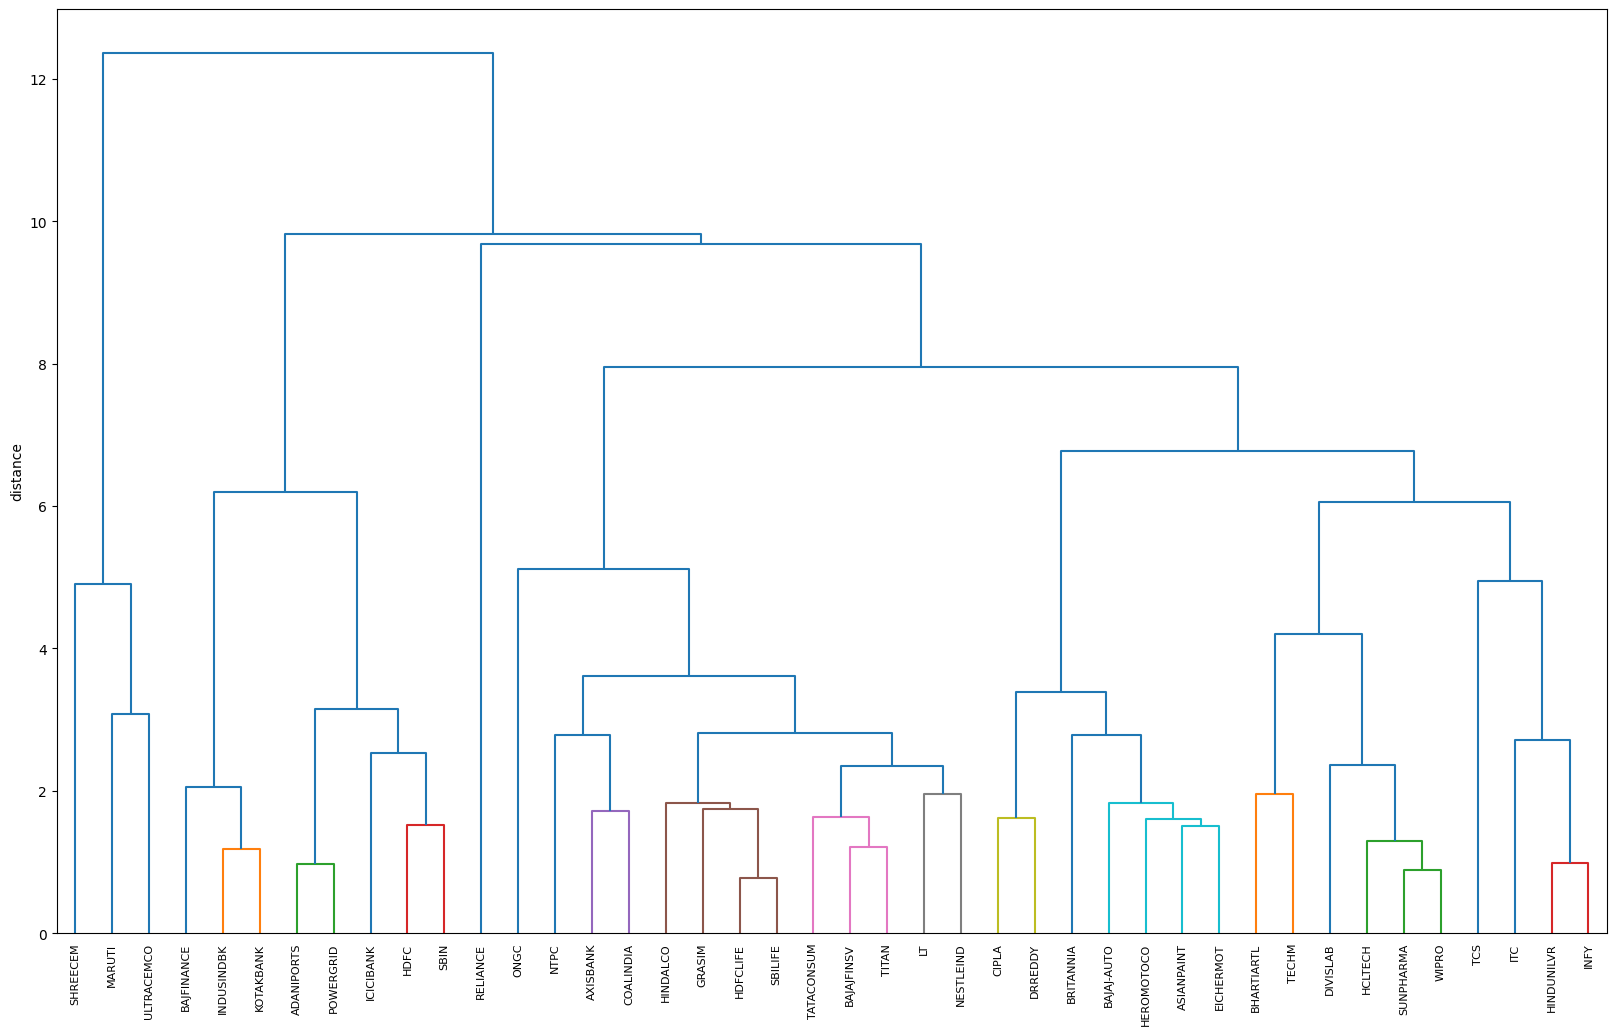

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

#### **Interpreting the Dendrogram**
- Note that we are now plotting companies that are similar to one another.
- The leaves of the tree correspond to the records.
- The length of the branch in the tree indicates the degree of dissimilarity between corresponding clusters.
- All the clusterings are made in the 8 dimensional space

#### **Insights**
- We may think that companies working in same field will have similar trends in stocks and will be clustered together.
- In some cases, this is right. For example, we can see that AXISBANK, HDFCBANK, BAJAJFINANCE will be grouped together.
- While in some cases, it is not. Such as chances of tech companies like TCS, WIPRO, TECHMAHINDRA grouping together are only when we set the number of clusters very low.

#### **Calculating the number of clusters**

Text(0, 0.5, 'distance')

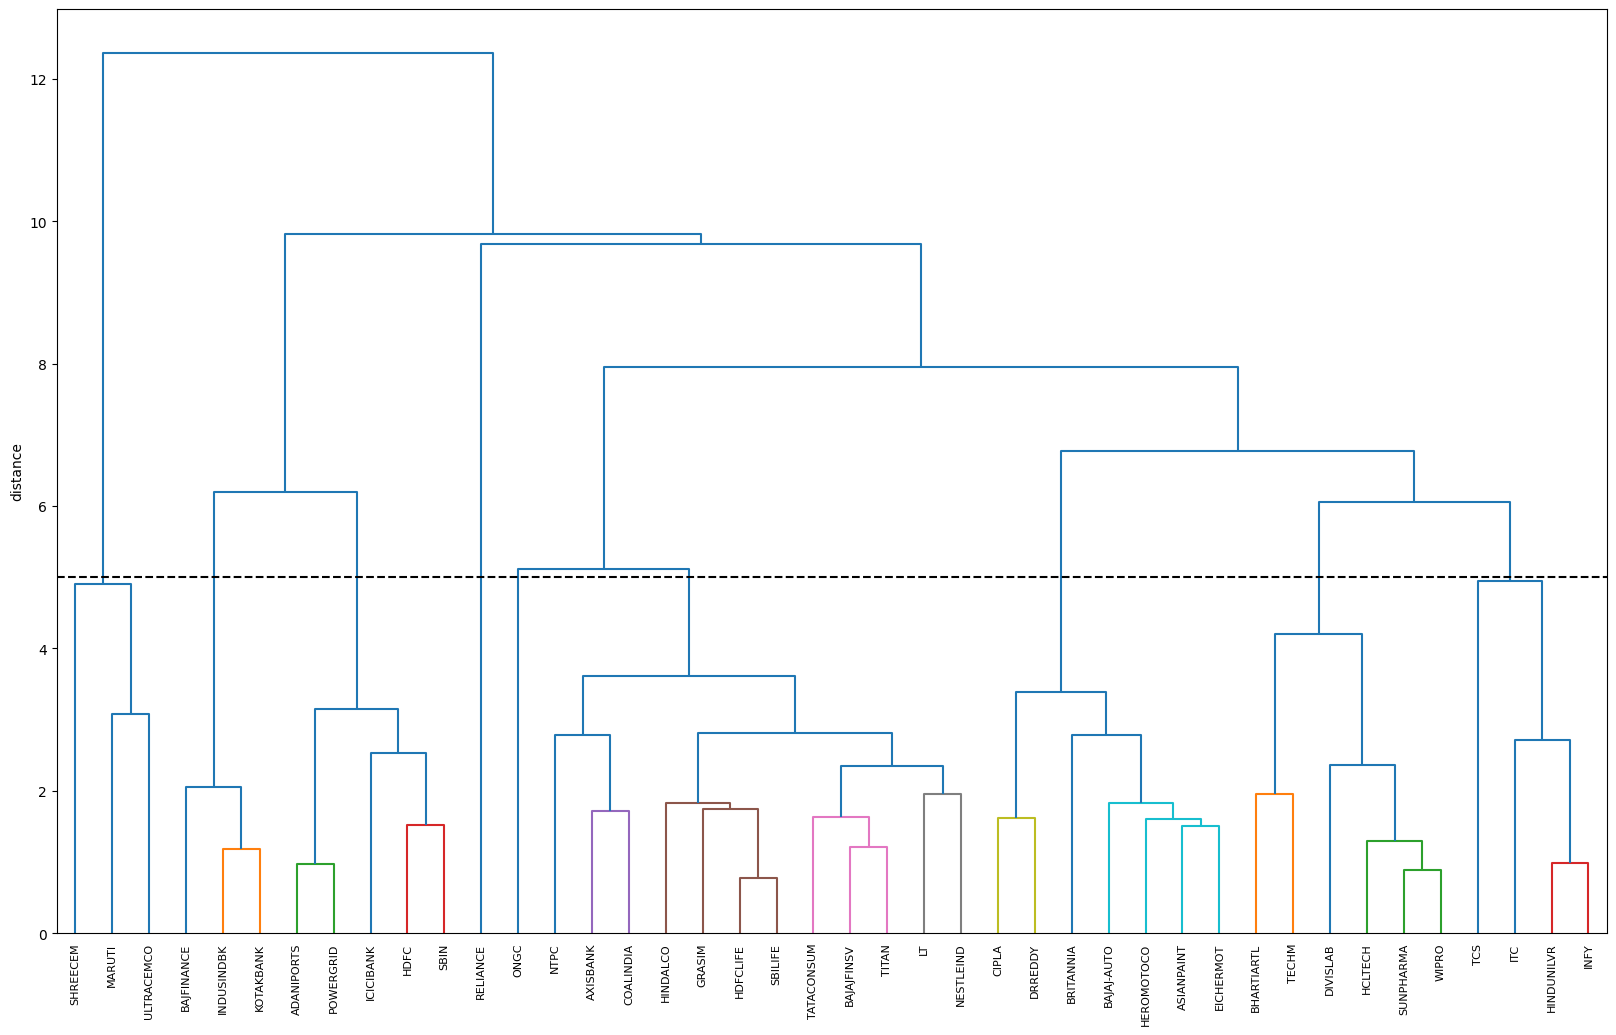

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=5, color='k', linestyle='--')
ax.set_ylabel('distance')

#### **Performing Agglomerative Clustering with 5 clusters**

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
y_pred = hc_2020.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
y_pred

array([2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 2, 1, 4, 1, 1, 1, 2, 3, 1, 4, 2, 0, 0, 1, 0, 1, 4, 0])

In [ ]:
viz_df = scaled_df
viz_df['Y_Predicted'] = y_pred

In [ ]:
viz_df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  -0.388733             3.058945                -0.517473   
ASIANPAINT  -0.094522            -0.569971                 0.841576   
AXISBANK     0.035365             0.609140                -0.345545   
BAJAJ-AUTO  -0.535037            -0.604999                -0.154514   
BAJFINANCE   0.375342            -0.528798                 0.123845   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS  -0.436242     -0.545191       -0.237950       1.139351   
ASIANPAINT  -0.494960     -0.471767        1.471393      -0.145937   
AXISBANK    -0.172211     -0.315810       -1.113258       0.630997   
BAJAJ-AUTO   0.468201     -0.438009        1.307699       0.111264   
BAJFINANCE   0.415343     -0.511843       -0.469500       3.054572   

            earningsGrowth  return_2020  Y_Predicted  
ADANIPORTS       -0.520369    -0.356203            2  
ASIANPAINT        0.843380     0.099408            0  
AXISBANK         -0.348193    -1.276439            1  
BAJAJ-AUTO       -0.118624     0.212540            0  
BAJFINANCE        0.121877    -0.991920            2

##### **Plotting the characteristics of the learned clusters**

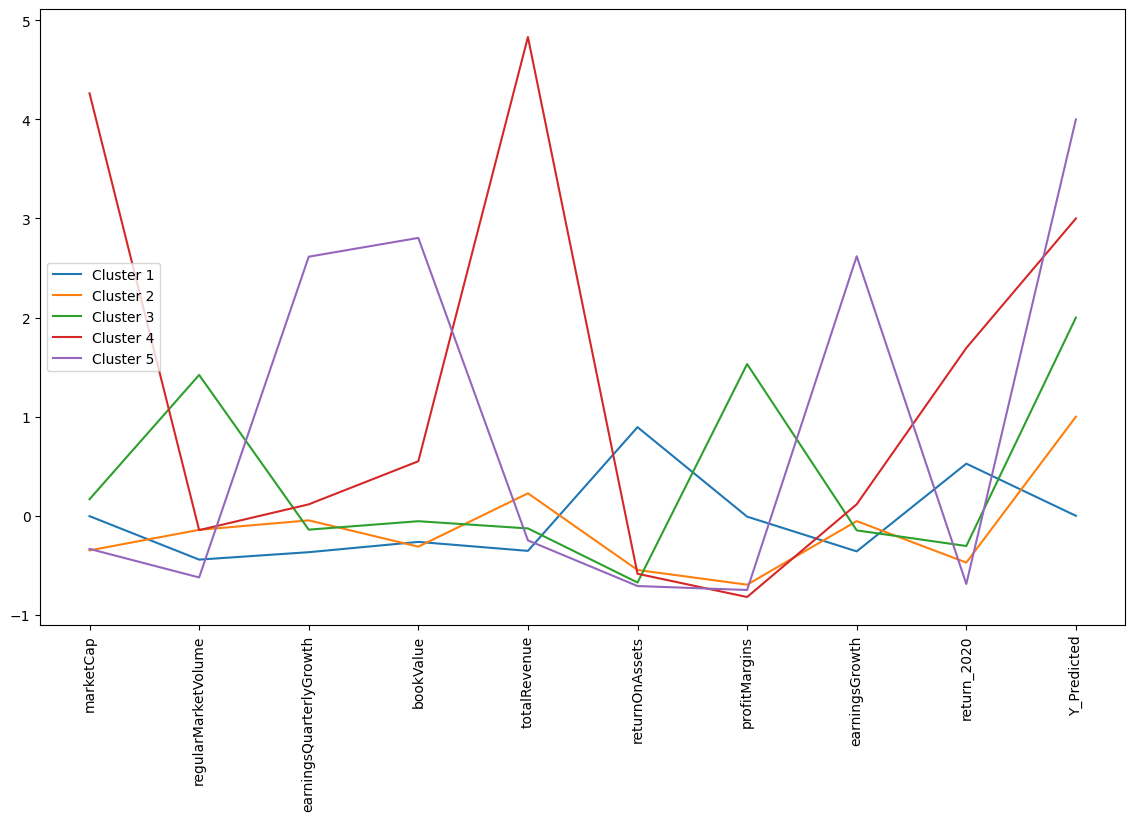

In [ ]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)


##### **Looking at this, What characteristics do we find unique in each of these learned cluster?**

- **Cluster 1** - Companies with average market capital, quarterly growth, total revenue returning average returns

- **Cluster 2** - Companies havning largest market capital, with low quaterly growth (because they are already dominating), high total revenue, and highest return

- **Cluster 3** - Trader's favourites - high market volume with good profit margins.

- **Cluster 4** - Low market capital, with low quarterly growth, having high total revenue, with second largest returns

- **Cluster 5** - low market cap, with very high quarterly growth, but lowest total revenue and returns

This way, with the help of Hierarchical Clustering, we can draw conclusions on how different data points are grouped into different clusters, and also get information about the features of the dataset based on which the grouping is done.

***

#### Comparing Hierarchical Clustering with K-Means++

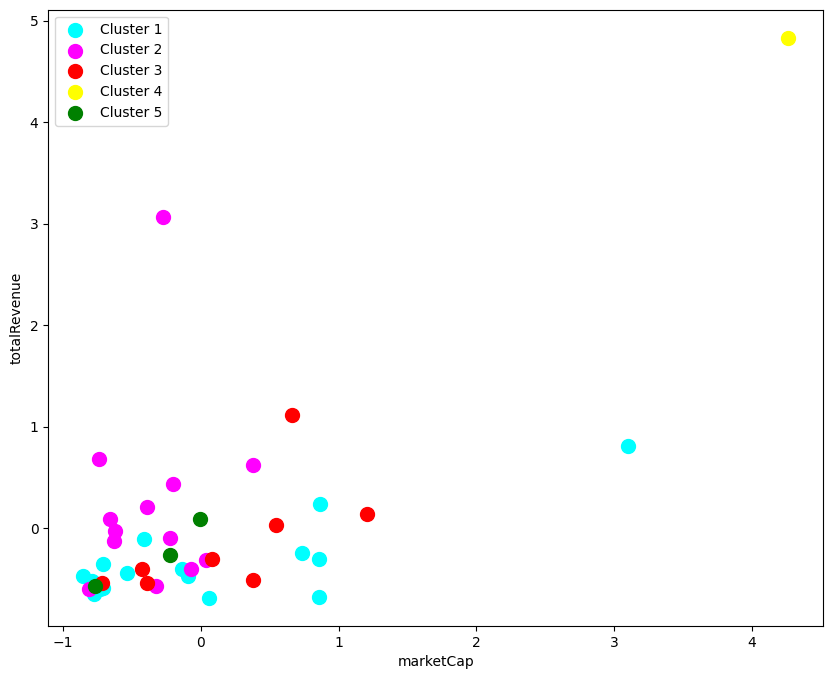

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(viz_df[viz_df['Y_Predicted'] == 0]['marketCap'], viz_df[viz_df['Y_Predicted'] == 0]['totalRevenue'], s=100, c='Cyan', label='Cluster 1')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 1]['marketCap'], viz_df[viz_df['Y_Predicted'] == 1]['totalRevenue'], s=100, c='Magenta', label='Cluster 2')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 2]['marketCap'], viz_df[viz_df['Y_Predicted'] == 2]['totalRevenue'], s=100, c='Red', label='Cluster 3')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 3]['marketCap'], viz_df[viz_df['Y_Predicted'] == 3]['totalRevenue'], s=100, c='Yellow', label='Cluster 4')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 4]['marketCap'], viz_df[scaled_df['Y_Predicted'] == 4]['totalRevenue'], s=100, c='Green', label='Cluster 5')
plt.xlabel('marketCap')
plt.ylabel('totalRevenue')
plt.legend()
plt.show()

From the dendogram one important thing we concluded was that we may think comanies in the same industries will have same stock figures, it is often the opposite.

From the clusters shown in the results of hierarchical clustering, you will observe that though points which are very close to each other belongs to other clusters.

This often happens in the real world and this is where KMeans/KMeans++ would not give effective results.

Let's also see K-Means++ results which would give more intuition.

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, init = 'k-means++', random_state = 50)
y_km = km.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
viz_df['km_predicted'] = y_km

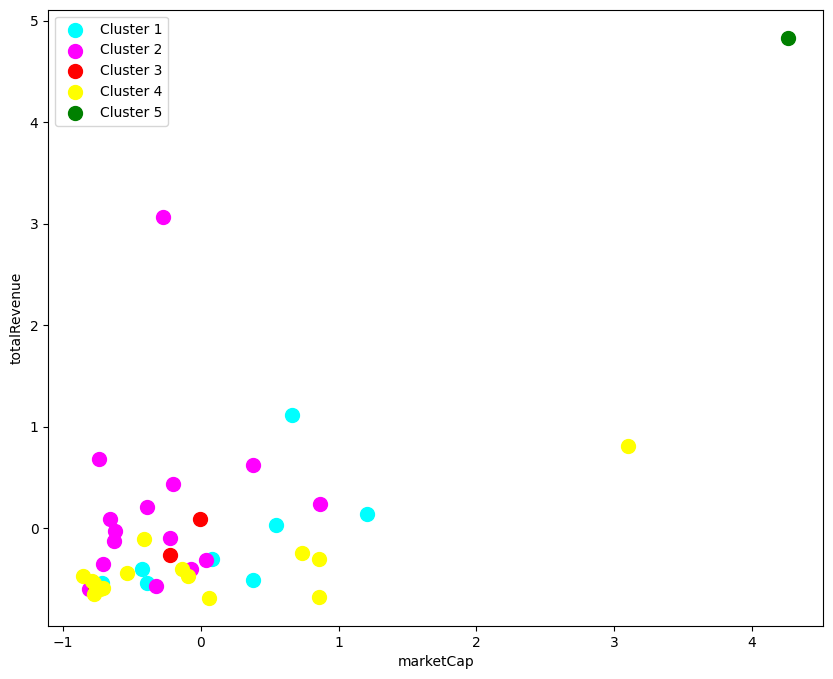

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(viz_df[viz_df['km_predicted'] == 0]['marketCap'], viz_df[viz_df['km_predicted'] == 0]['totalRevenue'], s=100, c='Cyan', label = 'Cluster 1')
plt.scatter(viz_df[viz_df['km_predicted'] == 1]['marketCap'], viz_df[viz_df['km_predicted'] == 1]['totalRevenue'], s=100, c='Magenta', label = 'Cluster 2')
plt.scatter(viz_df[viz_df['km_predicted'] == 2]['marketCap'], viz_df[viz_df['km_predicted'] == 2]['totalRevenue'], s=100, c='Red', label = 'Cluster 3')
plt.scatter(viz_df[viz_df['km_predicted'] == 3]['marketCap'], viz_df[viz_df['km_predicted'] == 3]['totalRevenue'], s=100, c='Yellow', label = 'Cluster 4')
plt.scatter(viz_df[viz_df['km_predicted'] == 4]['marketCap'], viz_df[scaled_df['km_predicted'] == 4]['totalRevenue'], s=100, c='Green', label = 'Cluster 5')

plt.xlabel('marketCap')
plt.ylabel('totalRevenue')
plt.legend()
plt.show()

## **GMM Implementation**

Let us now implement GMM with help of sklearn's GaussianMixture() class.

We'll also compare GMM with K-Means, and you'll get to see how GMM performs relatively similar to the K-Means

We'll use the previous dataset that we used in our customer segementation usecase for DBSCAN

In [ ]:
!gdown 1TyC3sl4OM-NhmUTcCt4NN8nDZOWHOBrh

Downloading...
From: https://drive.google.com/uc?id=1TyC3sl4OM-NhmUTcCt4NN8nDZOWHOBrh
To: /content/std_df_gmm.pkl
100% 7.19k/7.19k [00:00<00:00, 22.7MB/s]


In [ ]:
!gdown 1Z6nMciyzLvw9fdt8ajdNDebkRTbj5FW-

Downloading...
From: https://drive.google.com/uc?id=1Z6nMciyzLvw9fdt8ajdNDebkRTbj5FW-
To: /content/df_gmm.pkl
100% 7.71k/7.71k [00:00<00:00, 23.6MB/s]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [ ]:
import pickle

In [ ]:
with open('/content/std_df_gmm.pkl','rb') as f:
    std_df = pickle.load(f)


with open('/content/df_gmm.pkl','rb') as f:
    df = pickle.load(f)

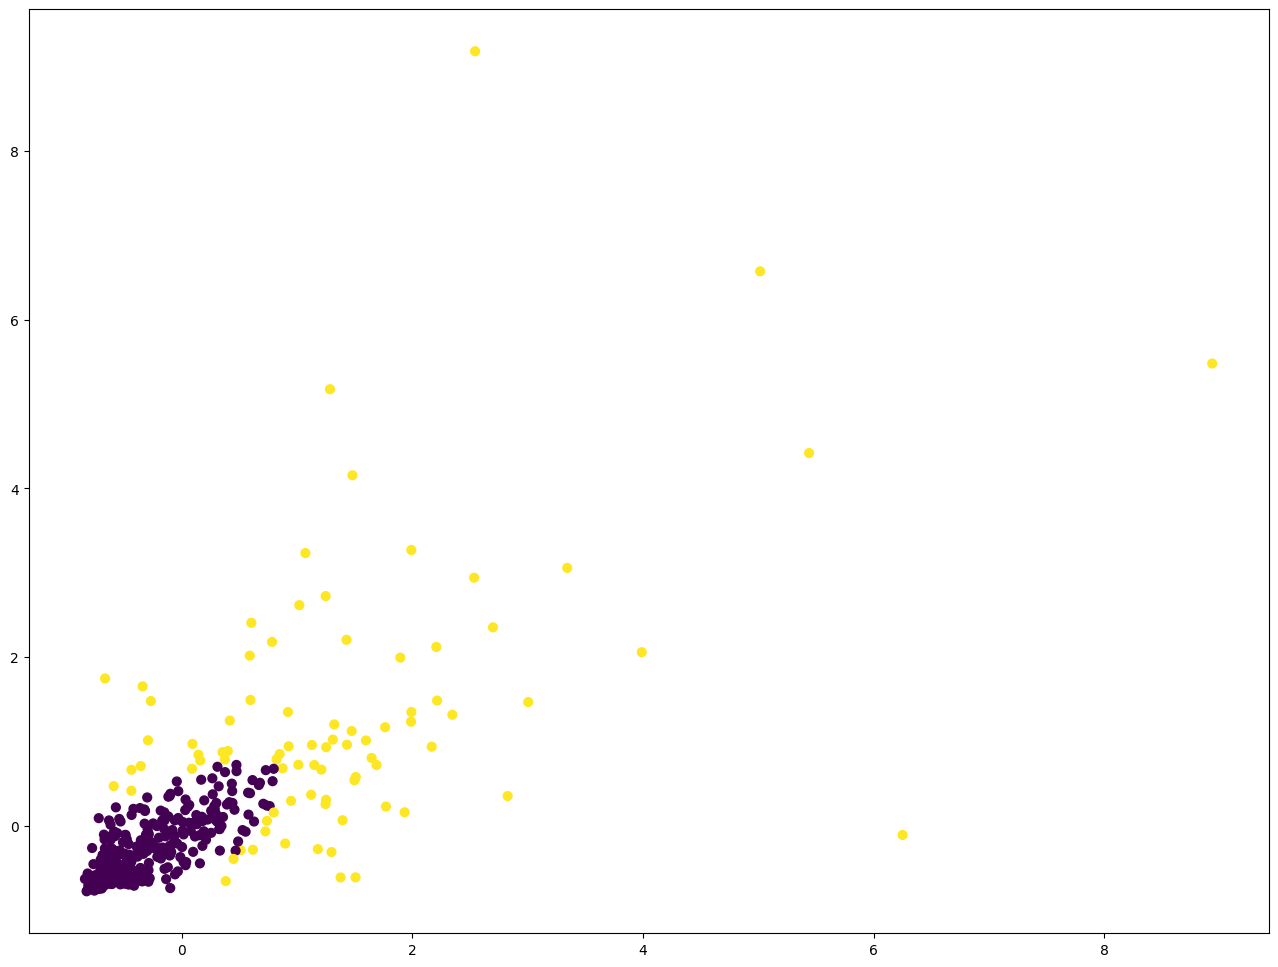

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(std_df)
labels = gmm.predict(std_df)
plt.scatter(std_df[:, 0], std_df[:, 1], c=labels, s=40, cmap='viridis');

##### **Comparing with K-Means**

In [ ]:
from sklearn.cluster import KMeans

k = 2 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
clusters = df.copy()
clusters['label'] = kmeans.labels_

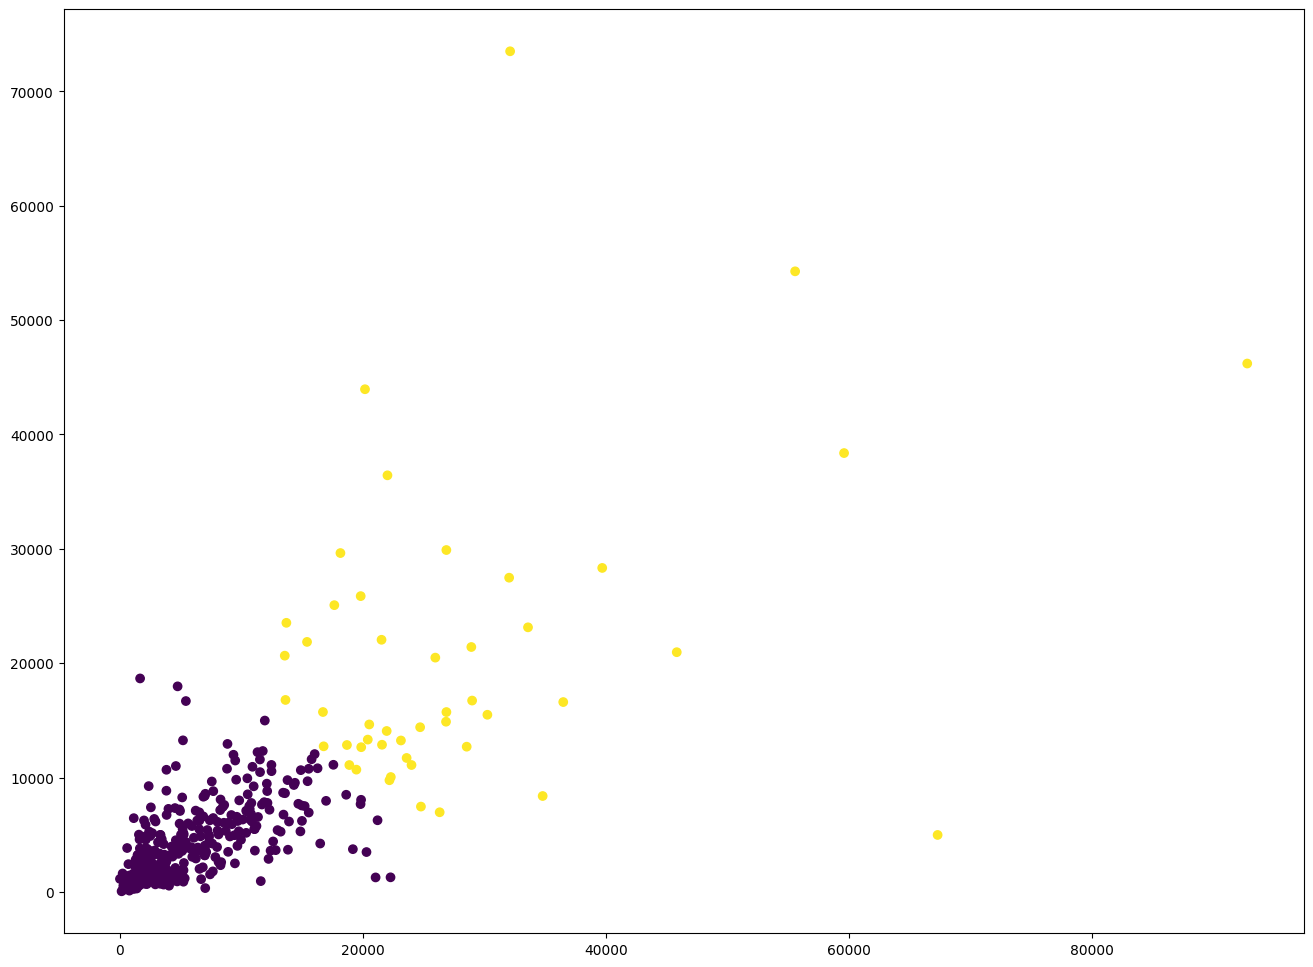

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], c=clusters['label'])

#### **Takeaways from GMMs:**

- One thing to note is that, while GMM may sound tempting, it performs quite similar to K-Means, and people end up using K-Means instead.

- It is less used because Hard GMM is same as K-Means.

- They also make a strong assumption that the data is generated with Mixture of Gaussian Distributions, which may not be True always.

## DBSCAN - Wholesale customer data

In [ ]:
!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL

Downloading...
From: https://drive.google.com/uc?id=10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL
To: /content/wholesaledata.csv
100% 15.0k/15.0k [00:00<00:00, 39.3MB/s]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [ ]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

- The dataset consists of 440 customers and has 8 attributes for each of these customers.

- No missing values

- Only two variables are **non-continuous (categorical)** in nature: Channel and Region.

- So for easing our computations, we will drop these two categorical features.

In [ ]:
# Dropping categorical variables for simplicity
df.drop(["Channel", "Region"], axis = 1, inplace = True)

#### **Visualizing the data in 2D**

Using 2 features:

1. **Grocery:** The customer’s annual spending (in some monetary unit) on grocery products.
2. **Milk:** The customer’s annual spending (in some monetary unit) on milk products.

#### Let's plot two features data now:

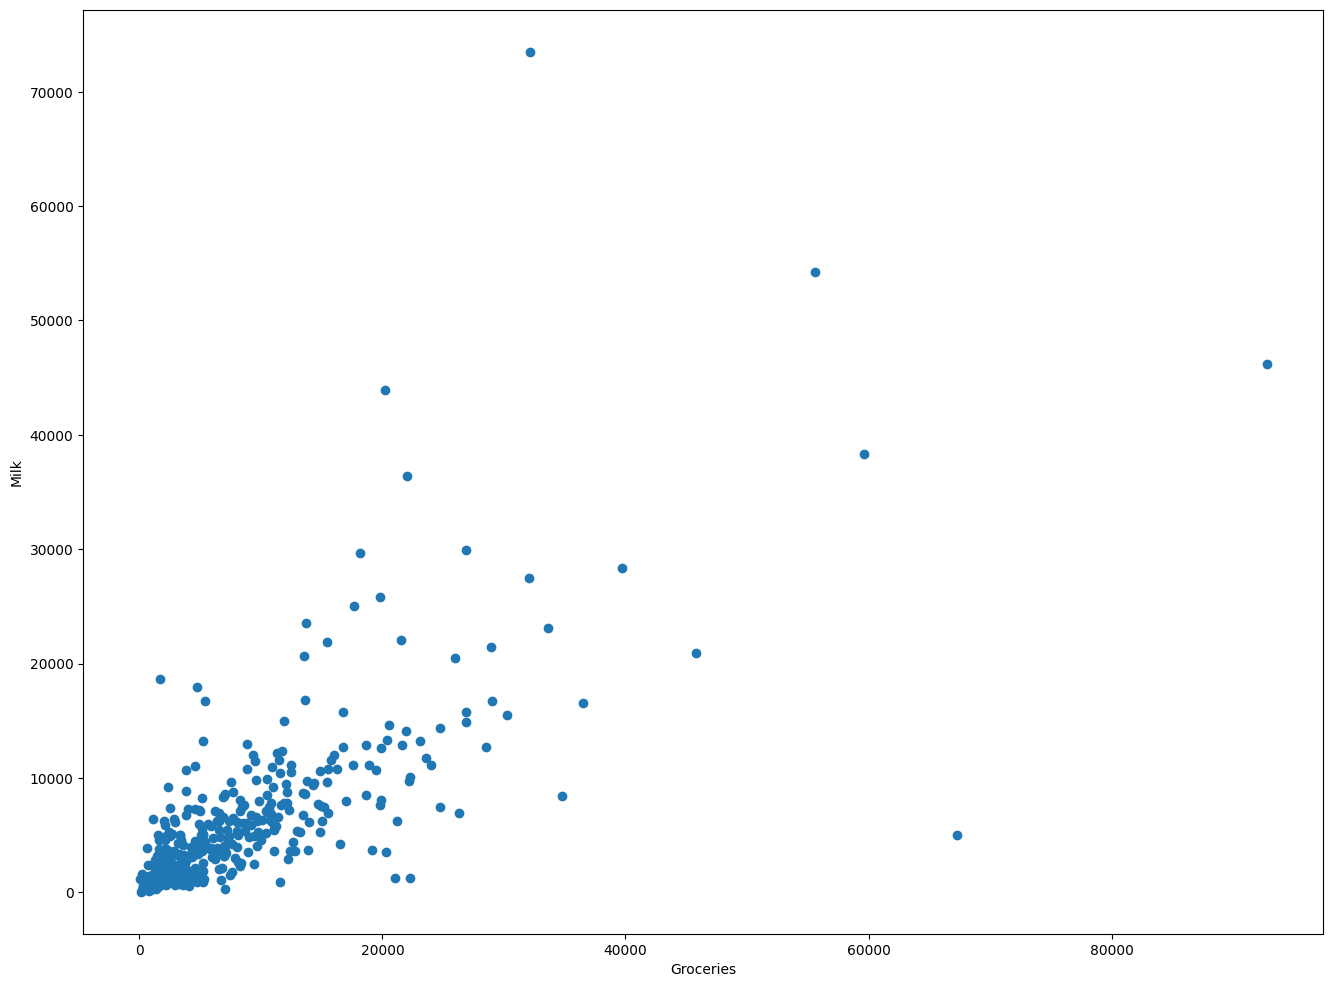

In [ ]:
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

**Q. Can you point out some problems that the clustering algorithms that we've learned till now might face?**

- We can easily see the data points that are far away from rest of the data points.

- Well, those are our **outlier** data points.

- **K-Means is sensitive to outliers** and will try to cluster the outliers as well.

In [ ]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [ ]:
from sklearn.cluster import KMeans

k = 2 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
clusters = df.copy()
clusters['label'] = kmeans.labels_
clusters

Grocery   Milk  label
0       7561   9656      0
1       9568   9810      0
2       7684   8808      0
3       4221   1196      0
4       7198   5410      0
..       ...    ...    ...
435    16027  12051      0
436      764   1431      0
437    30243  15488      1
438     2232   1981      0
439     2510   1698      0

[440 rows x 3 columns]

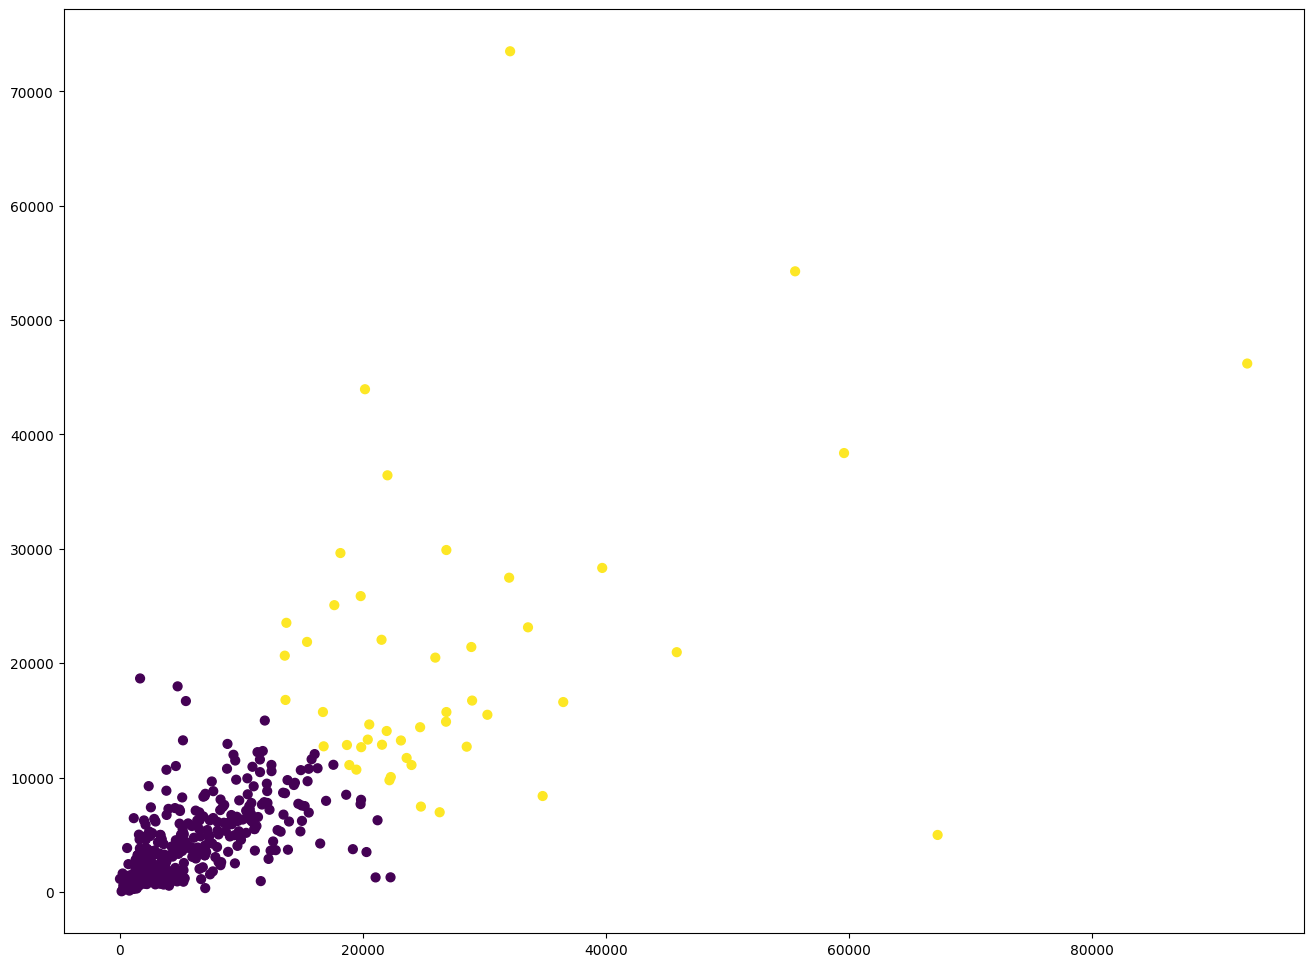

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

**Q. What about Hierarchical Clustering?**

- One can define the optimal number of clustering after the algorithm has converged. This can certainly reduce the affect of outliers on the results.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agc_pred = agc.fit_predict(std_df)
clusters['agc labels'] = agc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



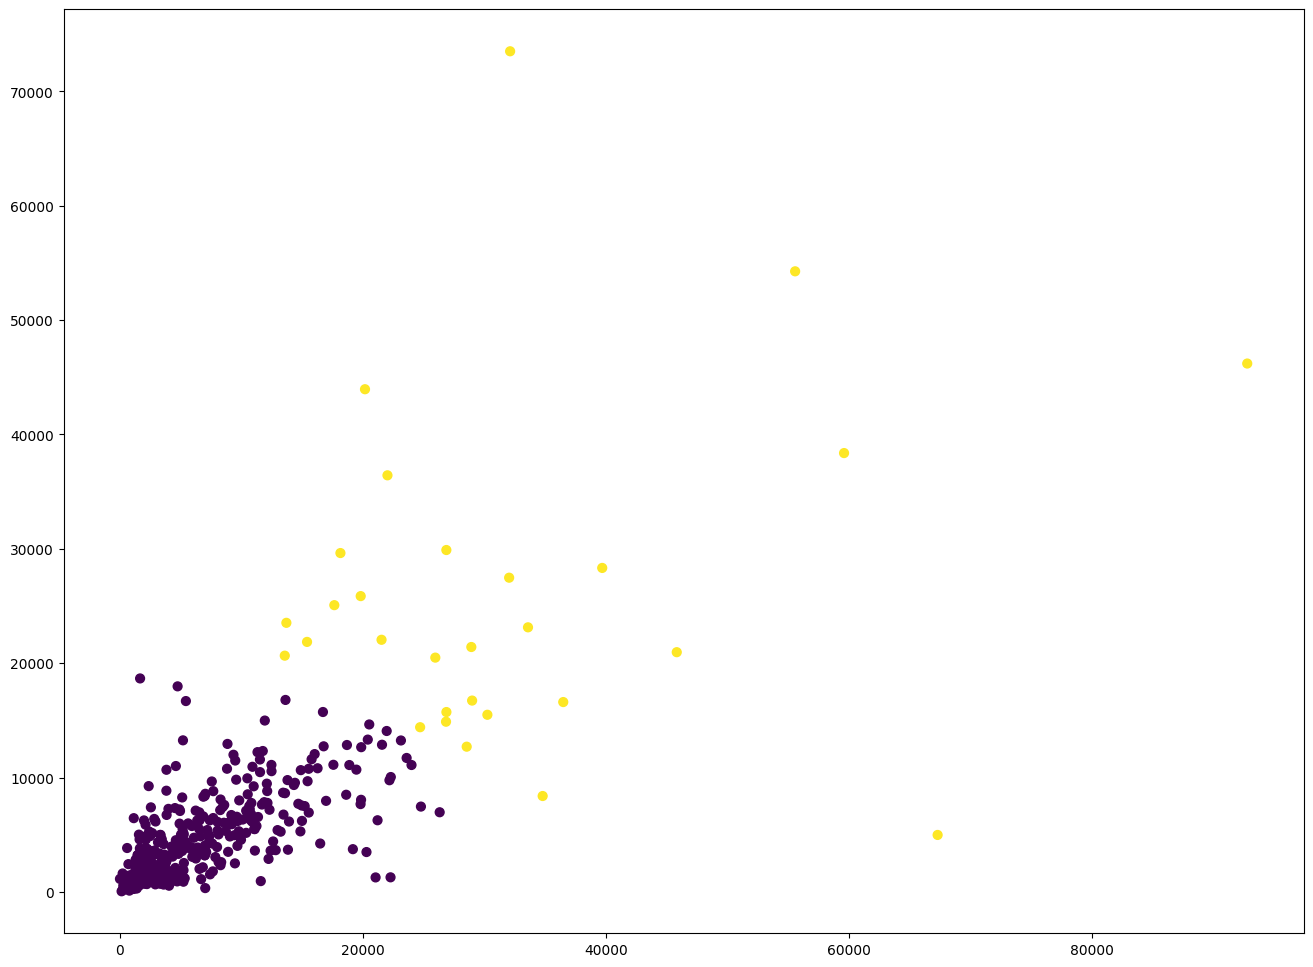

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['agc labels'])

**Q. So, why do we need to learn these two new algorithms?**
- If you notice carefully, a whole lot of customers are gruped together near the origin.

- At somewhere around the value of $(Groceris,Milk) = (25'000, 15'000)$, there are some noise points and that is where the customers are getting a little spread.

- Think of them as your premium segment customers from which the company makes a significant amount of sales.

- If we use hierarchical or K-Means clustering, chances are that significant part of these customers will get segment with regular ones (customers who spent less)

Let's see how DBSCAN tackles this problem.

#### **Fit and Transform using DBSCAN**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(std_df)

In [ ]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
out_df = df.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()

 0    404
-1     36
Name: label, dtype: int64

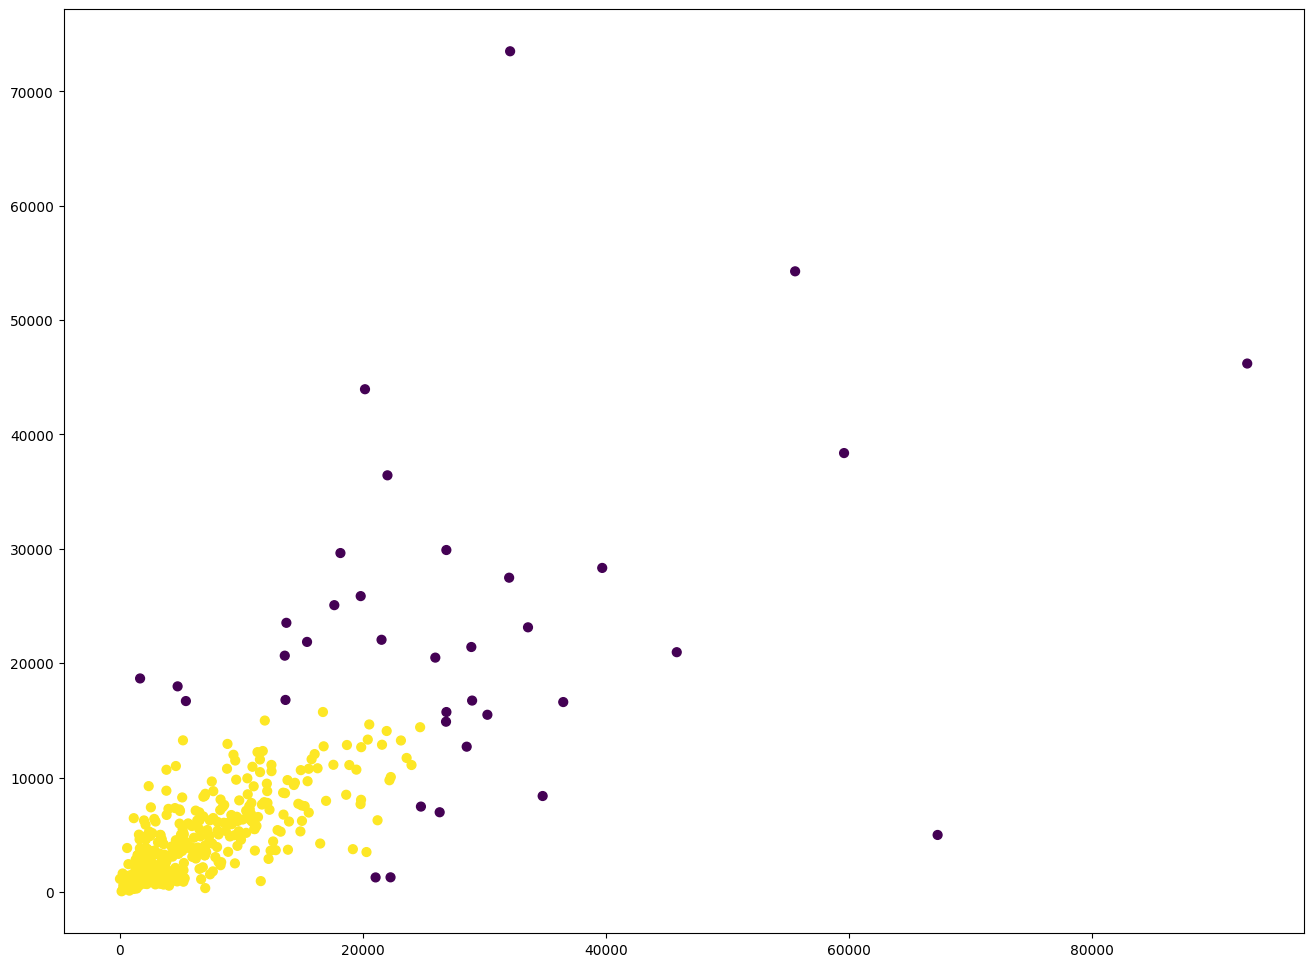

In [ ]:
plt.scatter(out_df['Grocery'], out_df['Milk'], s=40, c=out_df['label'])

#### **What insights can we draw from here?**

- Outliers are easily detected using DBSCAN, which can either be the premium segment customers, or they can just be customers with abnormal purchases.

- Most of the customers share the same behaviour (404 out of 440).

#### **Comparing with K-Means**

Let's now compare the results with K-Means' result

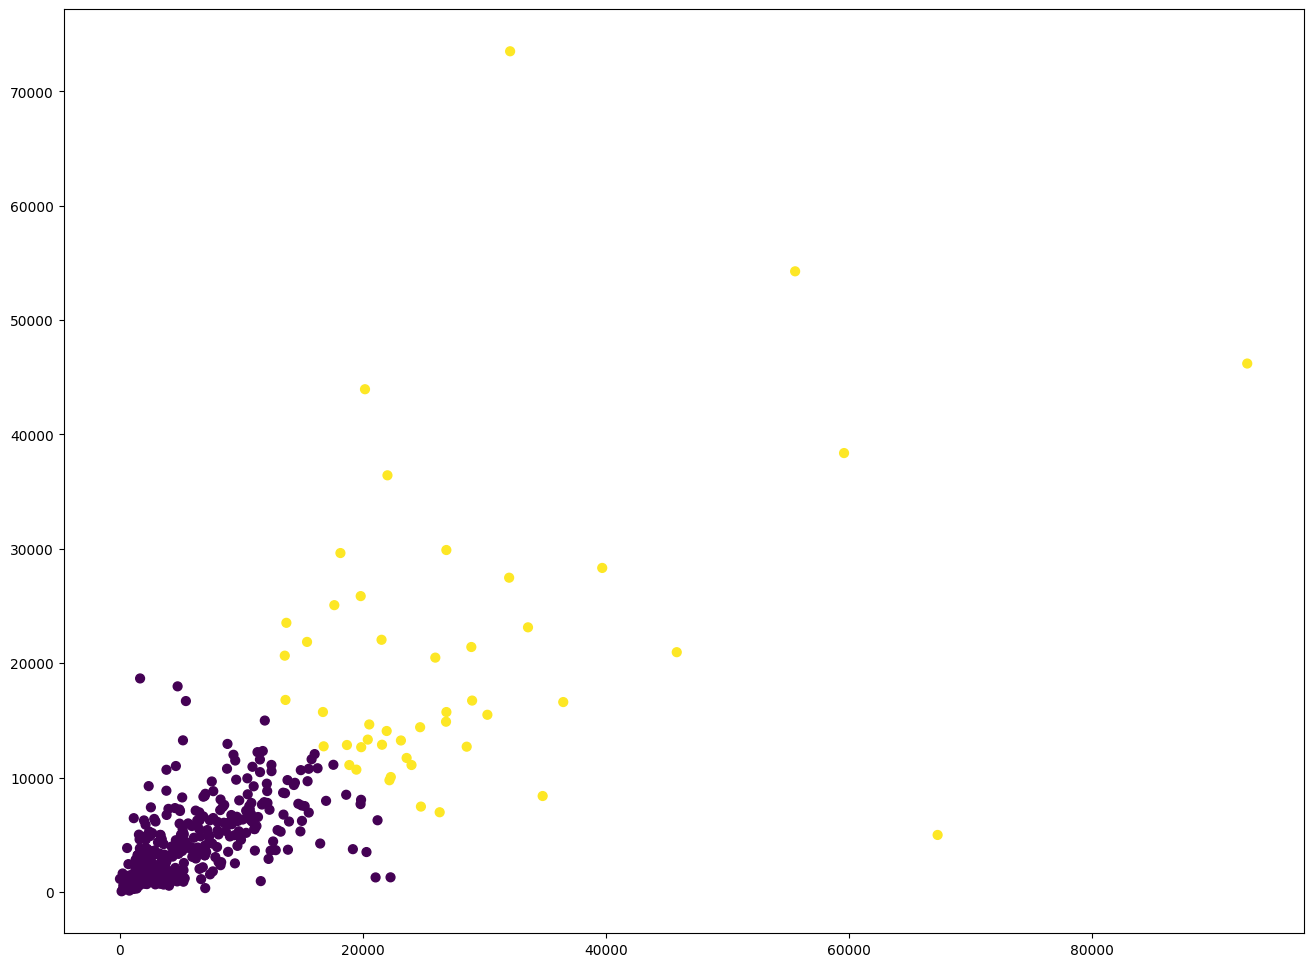

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

- As we can see, **K-Means formed 2 clusters with all the outliers included in one of the clusters.** Finding outliers or noise with K-Means is generally not possible because every point is grouped into a cluster.

- Whereas, **DBSCAN identified and separated out the outlier points**.

## Anomaly Detection

- Recall your Feature Engineering Classes back in ML-1 where you worked on Cars-24 Dataset.

- Now, you're aware that automobile industry is making a tranisition from **fuel (pertrol/diesel) based cars** to **Electric Cars (EVs)** because of high mileage given by EVs and other environmental concerns.

- As they are new in the industry, number of EVs is significantly smaller than the fuel-based cars.

- For used cars, one of the most important features that a buyer cares about is the mileage. We extracted two features namely '**Mileage**' and '**Price**' from the revised and newer data.

- We are using only these two features because these are the two most important things that buyer really cares about when purchasing a used car. In addition, for visual purposes, 2D data is easy to visualise which can help in understanding the algorithms that we are going to study in this lecture.

- Our task is to identify any novelties/anomalies/outliers that might be present in the data. Let's have a look at the data.

In [ ]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg



Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 46.5MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

Mileage      Price
0  54.282388  67.967708
1  17.331911  70.023637
2  36.548113  68.080455
3  42.567541  71.058755
4   5.608853  57.822432

In [ ]:
df.describe()

Mileage       Price
count  908.000000  908.000000
mean    45.869736   77.555036
std     30.598219   19.275677
min      1.398964   20.000000
25%     25.415487   64.435773
50%     34.599453   73.550501
75%     49.862529   88.939217
max    128.604249  141.201890

- Notice, something strange here?

- Look at the **Min** and **Max** values for both the features.

- Lets plot this data on a scatterplot.

Text(0, 0.5, 'Price')

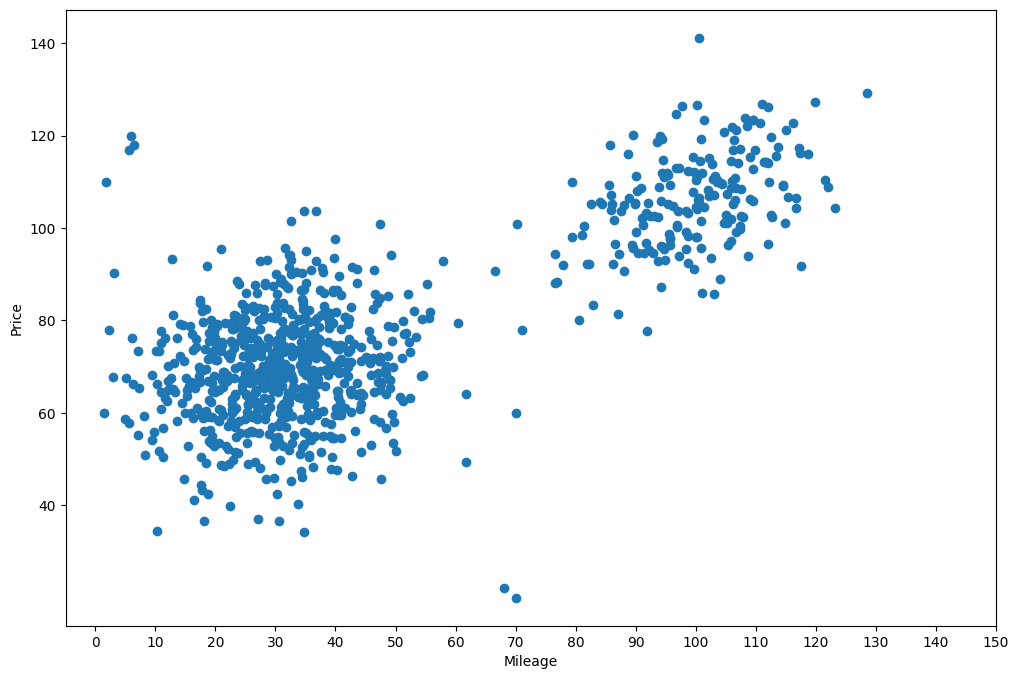

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')

### Ellipctic Envelope

#### **Sklearn implementation**

Now we'll create a model EllipticEnvelope with some random state and then fit that model on our data

In [ ]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=0).fit(df)
ee_pred = cov.predict(df)

In [ ]:
df['is_outlier_ee'] = ee_pred

Passing datapoints to predict whether it is an outlier or an inlier. Return $-1$ if outlier, or else it returns $1$

In [ ]:
cov.predict([[25, 50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but EllipticEnvelope was fitted with feature names



array([1])

Plotting the results of Elliptic Envelope

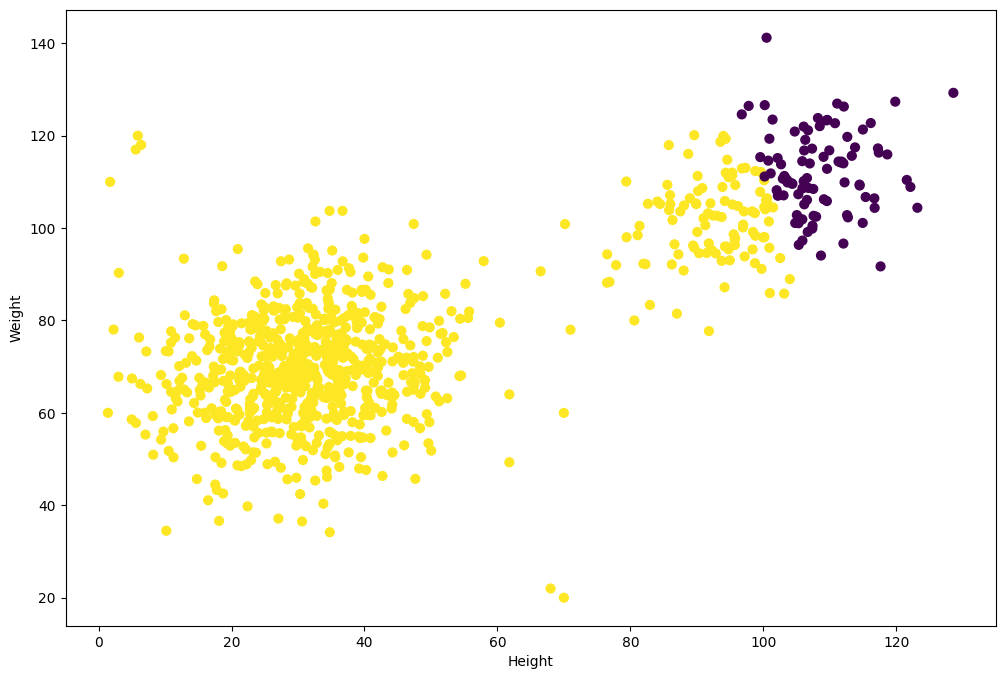

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_ee'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# using same data that we used in Elliptical Envelope -----> X
clf = IsolationForest(random_state=0, contamination = 0.08).fit_predict(df.iloc[:, :-1])
df['is_outlier_if'] = clf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



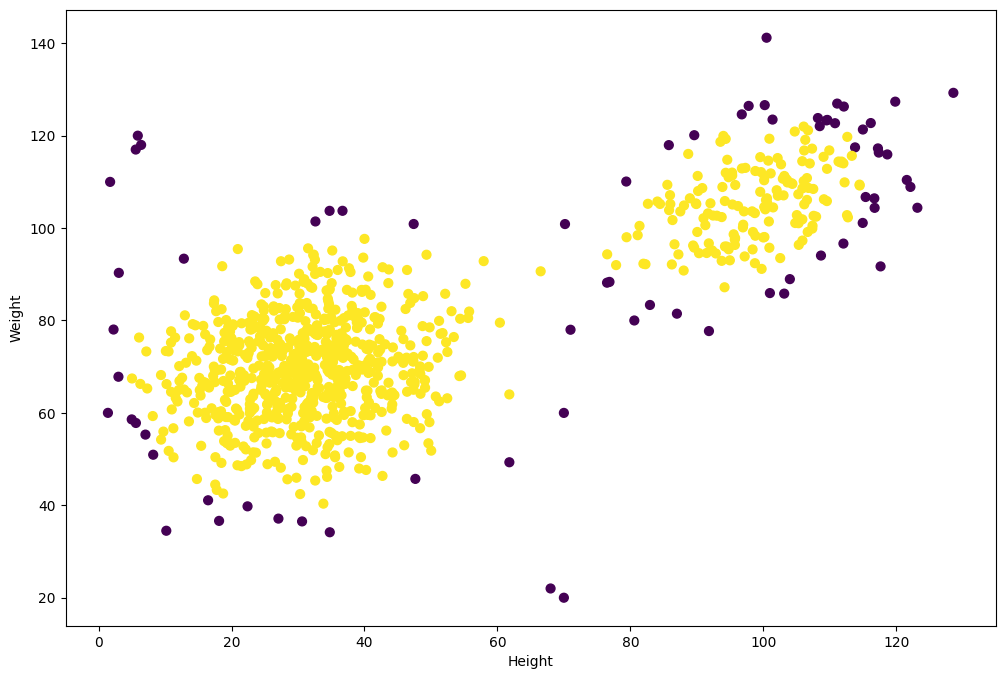

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Isolation Forests are heavily used when dataset size is very large because algorithms like Elliptical Envelope are typically harder and they have very strong assumptions


### LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.065).fit_predict(df.iloc[:, :2])
df['is_outlier_lof'] = clf

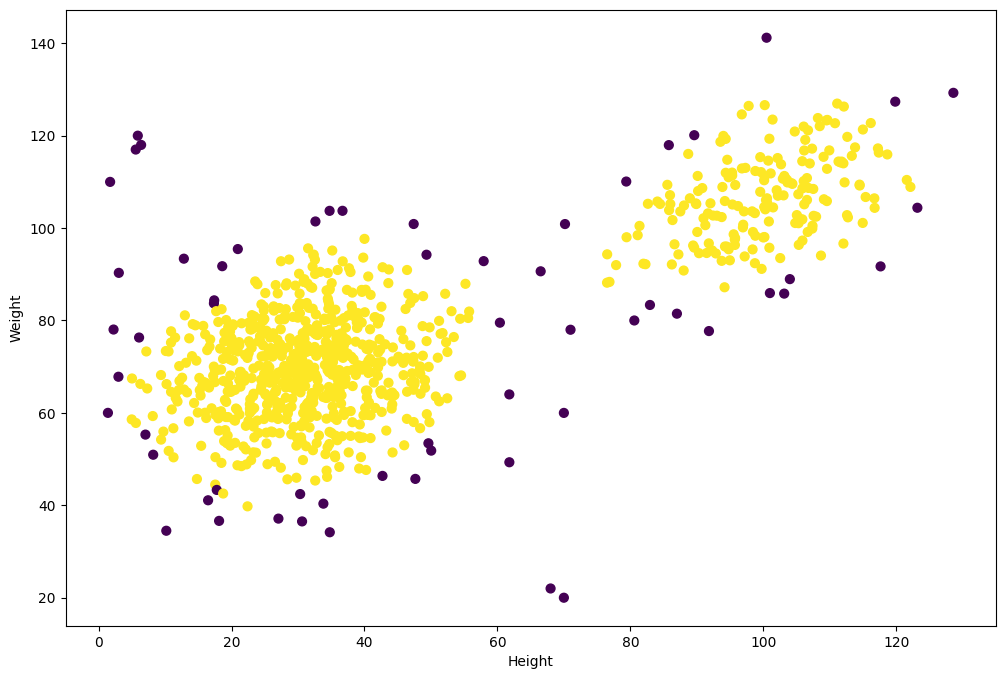

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## PCA

### Code implemetnation: PCA from scratch

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 2.12MB/s]


In [ ]:
data = pd.read_csv('/content/pca_2d_data.csv')
data.head()

f1        f2
0  2.038772  1.102760
1  0.869536  0.238030
2  1.795888  1.020364
3  0.103510 -0.513661
4  1.479554  0.750702

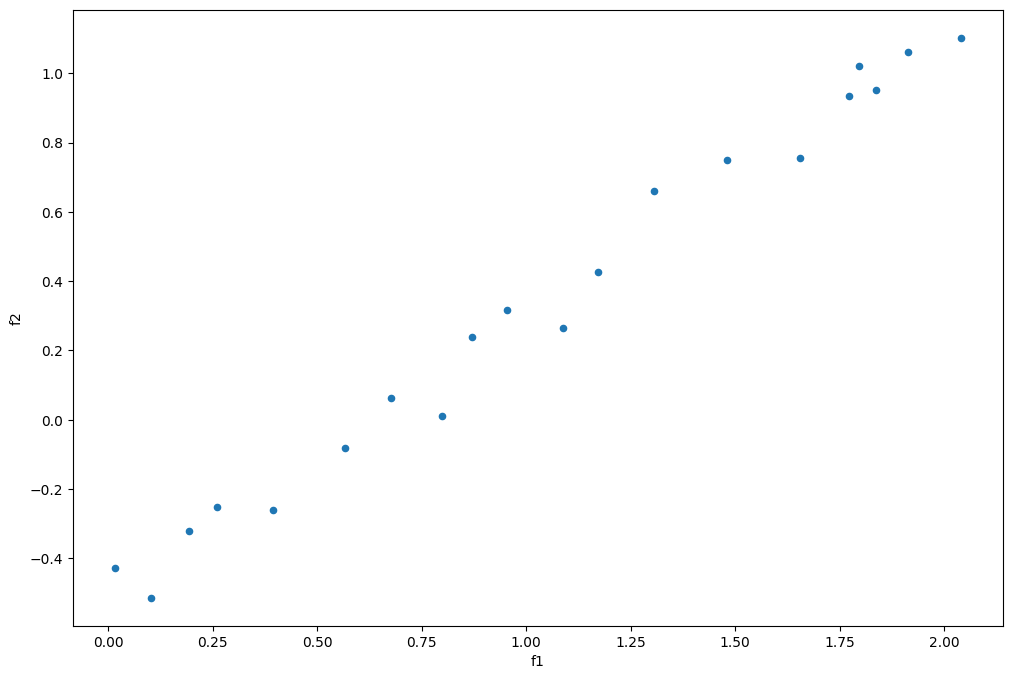

In [ ]:
data.plot(x='f1', y='f2', kind='scatter')
plt.show()

### From scratch

In [ ]:
## Implement PCA!!
# Step 1: Column standardization
x_data = data['f1'].values
y_data = data['f2'].values

mean_x = np.mean(x_data)
mean_y = np.mean(y_data)

std_x = np.std(x_data)
std_y = np.std(y_data)

x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y

X_st = np.zeros((len(x_data), 2))
X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs



Documentation np.linalg.eig: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.T, X_st) / (len(x_data)-1)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

eigenvectors = eigenvectors.T  #  thats how we want them (horizontal)
print(eigenvalues)



[2.09718701 0.00807615]


In [ ]:
# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
X_prime = eigenvectors[0].dot(X_st.T)
X_prime_reduced = X_prime



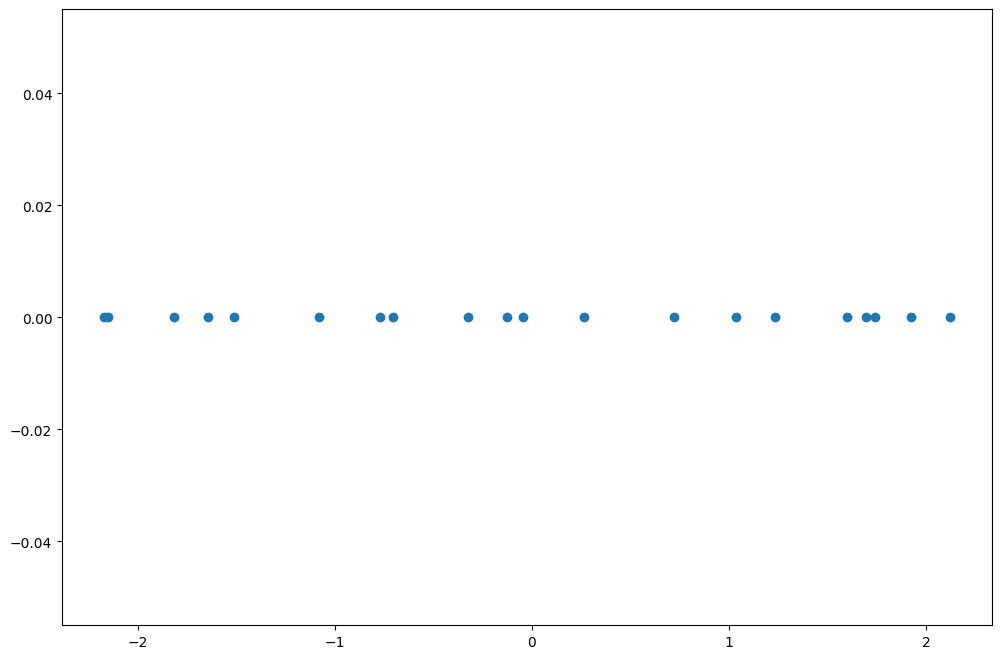

In [ ]:
# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(x_data),)))
plt.show()

In [ ]:
eigenvectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Note:
- each column here represents an eigen vector



<center><img src="https://drive.google.com/uc?export=view&id=1phEhjGqM_7WRRXVmcbUISmUSIExVKzlJ" width=800></center>





### PCA impl: using helper libraries

[2.09718701 0.00807615]


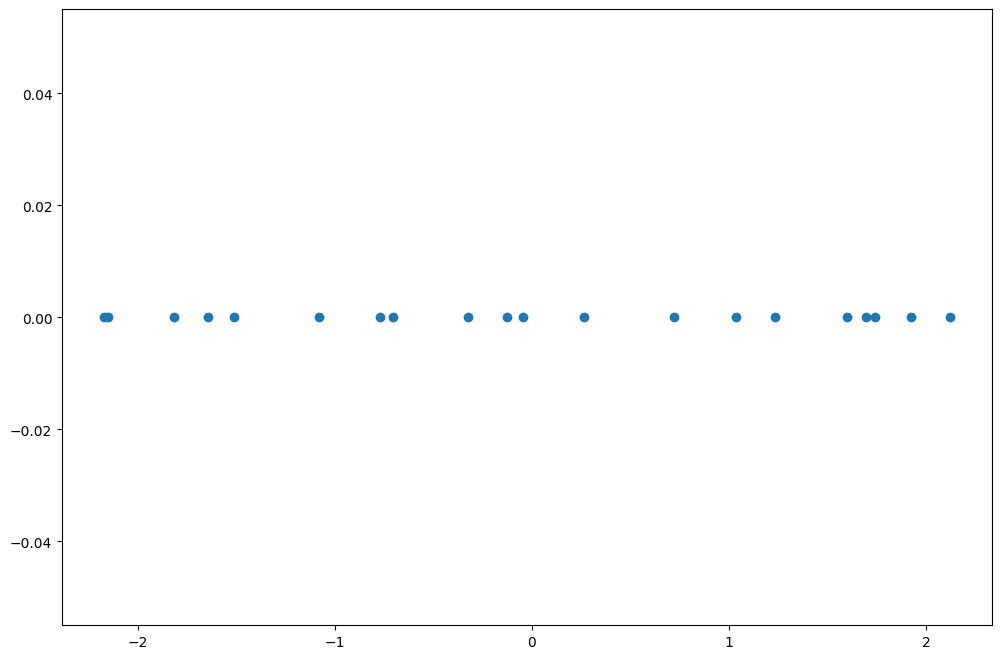

In [ ]:
from sklearn.preprocessing import StandardScaler

data_sc = StandardScaler().fit_transform(data)
cov = np.cov(data_sc.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

eigenvectors = eigenvectors.T # We want like this
print(eigenvalues)

X_prime_reduced = eigenvectors[0].dot(data_sc.T)

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(data_sc),)))
plt.show()

In [ ]:
eigenvalues

array([2.09718701, 0.00807615])

In [ ]:
# explained variance
eigenvalues[0] / eigenvalues.sum()

0.9961638305134559

### Sklearn impl

In [ ]:
from sklearn import decomposition


pca = decomposition.PCA(n_components=2)

X_p = pca.fit_transform(data_sc)
print(pca.explained_variance_)



[2.09718701 0.00807615]


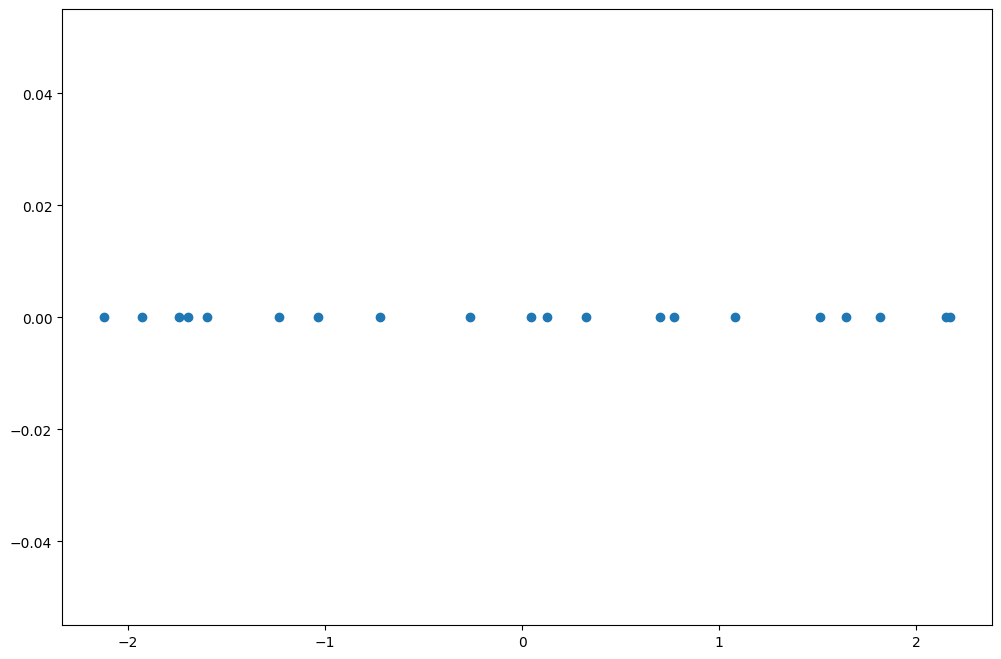

In [ ]:
plt.figure()
plt.scatter(X_p[:, 0], np.zeros((len(data_sc),)))
plt.show()

In [ ]:
pca.components_
# here each row represent a PC. First is x=y. Second is x = -y => Matches scratch impl

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
pca.explained_variance_

array([2.09718701, 0.00807615])

In [ ]:
pca.explained_variance_ratio_

array([0.99616383, 0.00383617])

### Usecase: High Dimensional Visualization using PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
from matplotlib.pyplot import cm
import seaborn as sns

#### **Loading dataset**

In sklearn we have a very interesting dataset called **'digits'**.
The dataset contains information about handwritten digits from $0$ to $9$

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

You can see below that dataset has some **data**, a **target variable**, and actual images in **images** which can be used for visualizing images

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

**Q. So, how our dataset looks like?**

- We define **data** as our features and **target** as target variable

**NOTE:** Do not confuse below given $Y$ with $y_{i}$s that we used when understanding PCA


In [ ]:
X = digits.data
Y = digits.target

Our dataset contains $1797$ images with $64$ features

In [ ]:
X.shape

(1797, 64)

If you see the shape of an image, it is represented as $8$x$8$ matrix.

We use grayscale representation where an image pixel takes values in $[0,255]$; where $0$ indicates pure black and $255$ indicates pure white

In [ ]:
digits.images.shape

(1797, 8, 8)

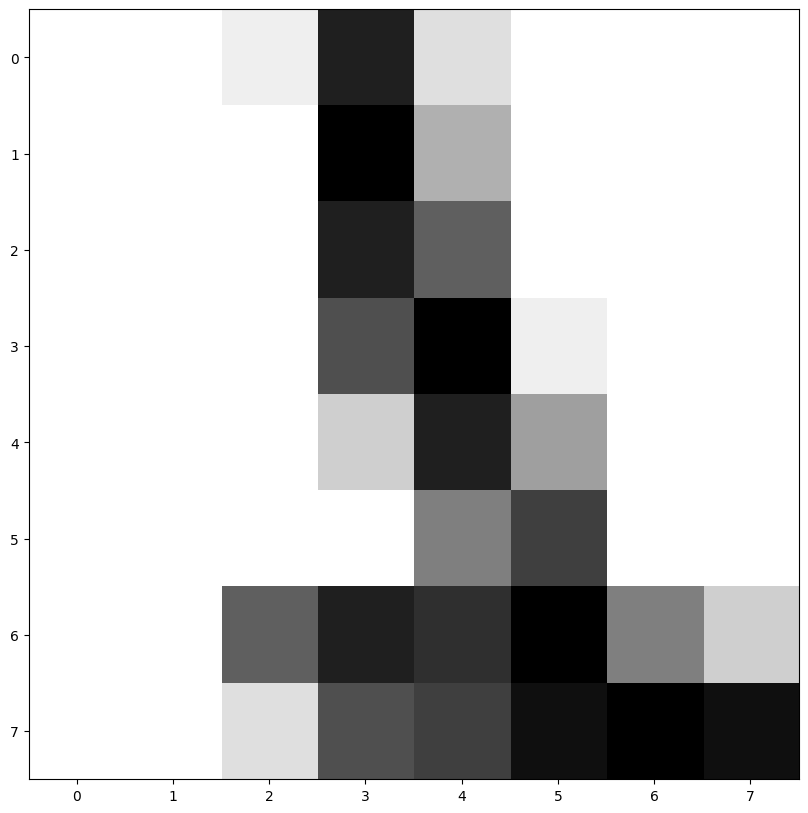

In [ ]:
plt.gray()
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r) #------> seems like number 1

#### **Implementing PCA**

We can implement PCA using sklearn's **PCA** method present in **decomposition** module.

Here we'll use PCA for mapping 64-dimensional digits data into 2-dimensional data. We do this by using parameter **n_components** in **PCA** method

We then fit PCA model on to our data $X(1797$ x $64)$ and this will calculate the top two eigen vectors will get computed ($u_{1}$, $u_{2}$)

Then, we use transform the data which basically does matrix multiplication of $x_{i}$s with eigen vectors ($u_{1}$, $u_{2}$)

In [ ]:
from sklearn import decomposition

In [ ]:
#PCA
# %%time prints the time taken for execution for this cell
%%time
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z1 = pca_2D.transform(X)

CPU times: user 22.9 ms, sys: 22.2 ms, total: 45.1 ms
Wall time: 35.1 ms


Let's now plot the results. For that we are going to use customized colormap using matlpotlib's **ListedColormap**

We'll use 10 different colors using target variable $Y$

#### **Plotting results**

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

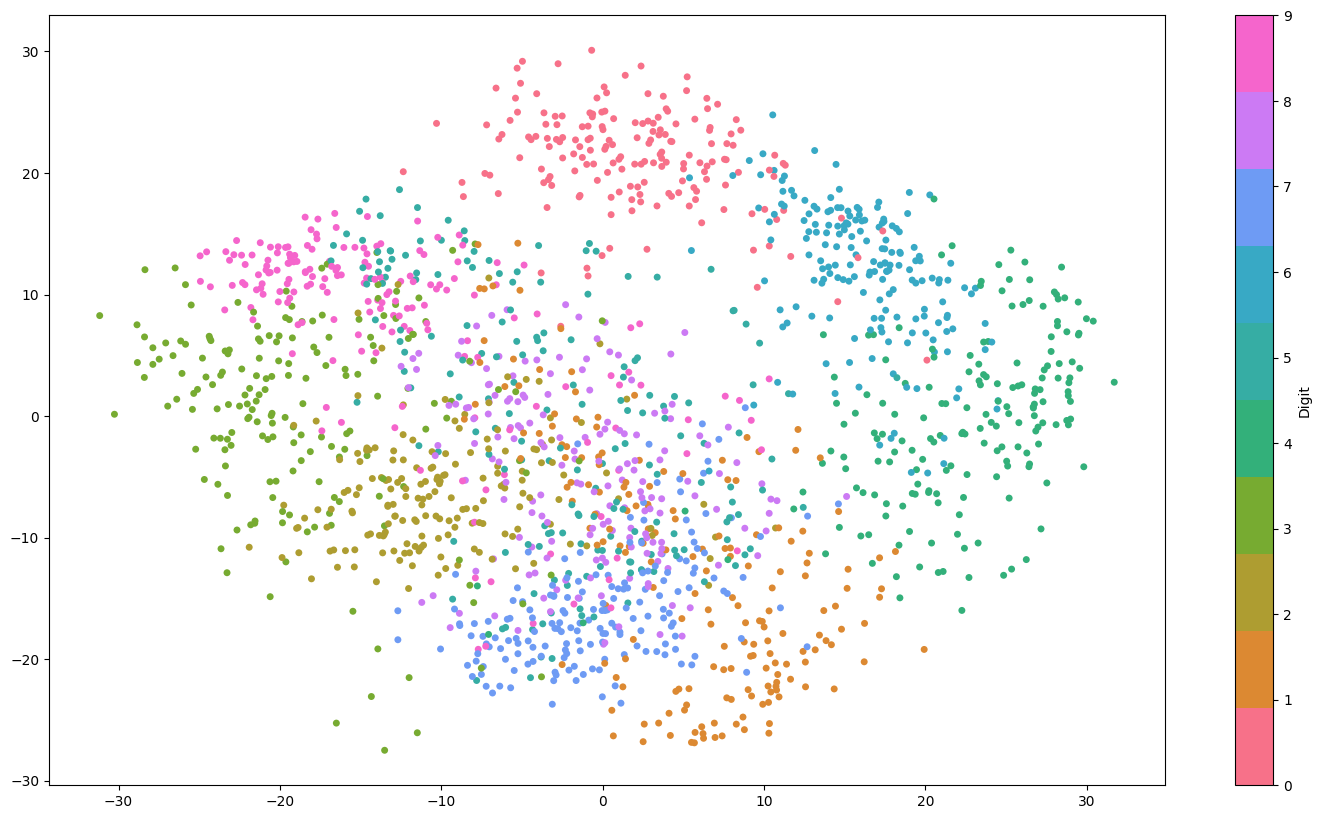

In [ ]:
fig, ax = plt.subplots()

"""
  on x-axis we use 0th dimension of z1
  on y-axis we use 1th dimension of z2
"""

im = ax.scatter(Z1[:,0], Z1[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### **What can we interpret from this?**

- $7$ is represented by light bluish color, $8$ is represented by light purplish color and $9$ with slightly more dark pink color

- You can see all these points are getting overlapped in the central region.

- This tells the similarity between three digits, as people have different handwritings and sometimes different digits often appears the same

- Whereas digits like $3$ and $4$  are difficult to get mixed and hence they are grouped around the left and right side of the plots respectively.

#### Variance preserved by 2 components

In [ ]:
decomposition.PCA(n_components=2).fit(X).explained_variance_ratio_.sum()

0.2850936482369767

Notice that
- Only 28% of variance is preserved by 2 components.

## Tsne

### **Implementation of t-SNE**

For implementing t-SNE, we'll use **openTSNE**.

But, you can also use sklearns t-SNE. For more, you can refer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"> this link </a>

#### **Installing openTSNE**

In [ ]:
!pip install openTSNE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.1 MB/s eta 0:00:00


We'll use the same digits dataset that we used in the PCA.

We are setting **n_jobs** = -1, which means we are using all the CPU cores available on the machine

We're initlializing randomly, and using Barnes Hut method, and fitting on our data $X$

#### **Fitting t-SNE on data**

In [ ]:
from openTSNE import TSNE

In [ ]:
# tSNE
%%time
Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)

CPU times: user 2min 28s, sys: 2min 40s, total: 5min 8s
Wall time: 2min 59s


Looking at the CPU times, we can see how expensive t-SNE is in comparision with PCA.

Let's now visualize the t-SNE results

#### **Visualizing t-SNE results**

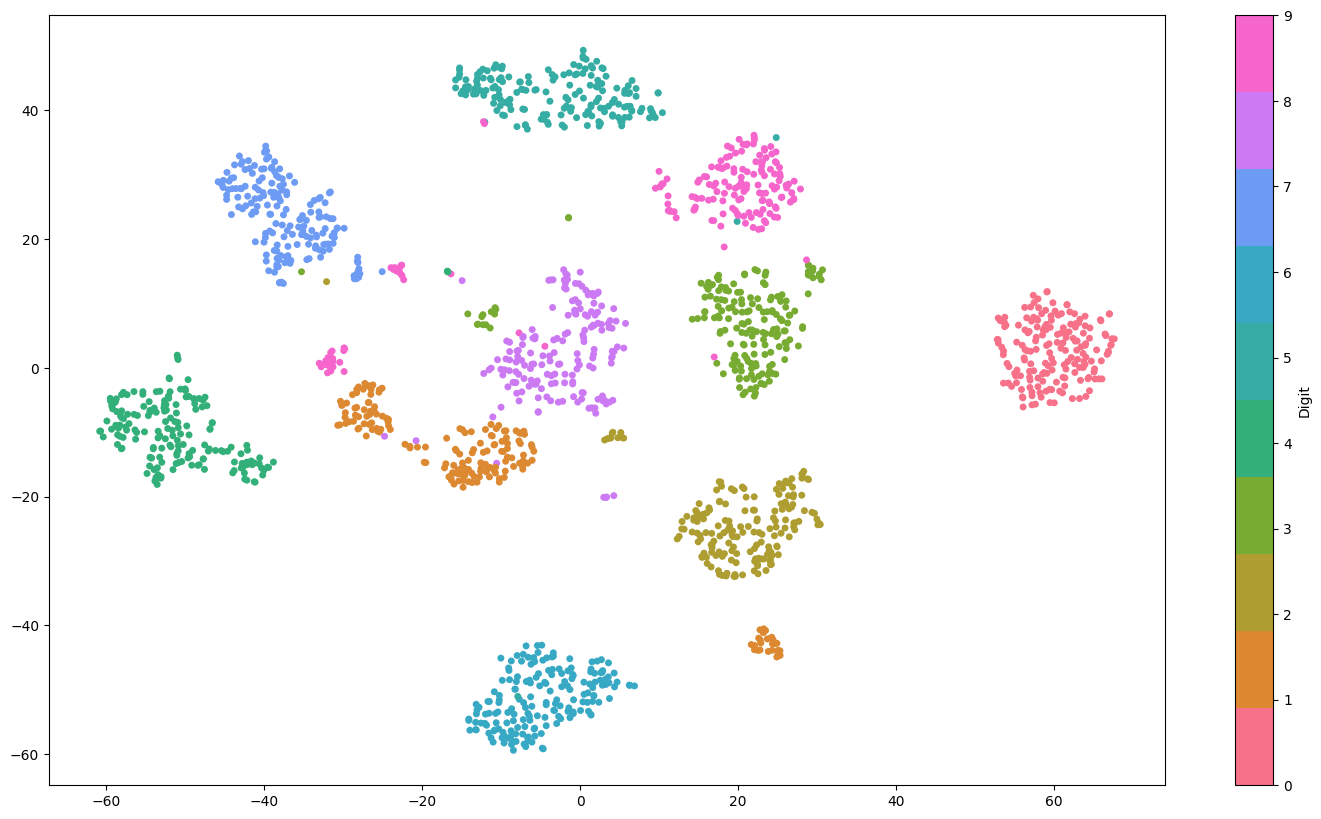

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(Z2[:,0], Z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### **Interpreting the results**

Unlike PCA, here if there were no labels($Y$), we can easily differentiate the different clusters

You can see how well t-SNE preserves the neighborhood information, which was not done by the PCA

Other than this, we can still figure out a lot from the results that we got. Let's see a few points that we can learn from the plots.

1. If you see, the $1$s are represented by orange. There are 3 clusters of points beloning to class $1$ which are close to the clusters of class $2$, $8$, and $9$.
  - This represents that in real world, people with different handwritings might have similar apperances of 1 with the numbers $2$, $8$, and $9$

<img src='https://drive.google.com/uc?id=1N3C2tKyKGQxdqlWq9fJ4EAxUYS-WS6vL'>

2. Class $3$ is represented by green color. While most of the green points are clustered together, some of the green points are scattered towards cluster of $8$.

  - This also represents the variablity that human handwriting has in real world due to which both the numbers may be interpreted as the same


Based on this, even if the plot did not have colors, we can figure out the similar clusters and we can perform data analysis on that group of points

## UMAP

### **UMAP Implementation**

Here also, we'll be using the same digits dataset.
For implementing UMAP, we'll be using **umap-learn** library

#### **Installing libraries**

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=6eae7d0ec99d04af0d82704f95c63526360ffeeea18ed23f8e23137c3dc1e689
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from umap import UMAP

#### **Fitting UMAP**

You will see that UMAP is comparitively faster than t-SNE and this tends to be true for larger datasets as well

In [ ]:
%%time
Z3 = UMAP(init='random', random_state=42).fit_transform(X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



CPU times: user 19.2 s, sys: 78.6 ms, total: 19.2 s
Wall time: 29 s


#### **Visualizing results**

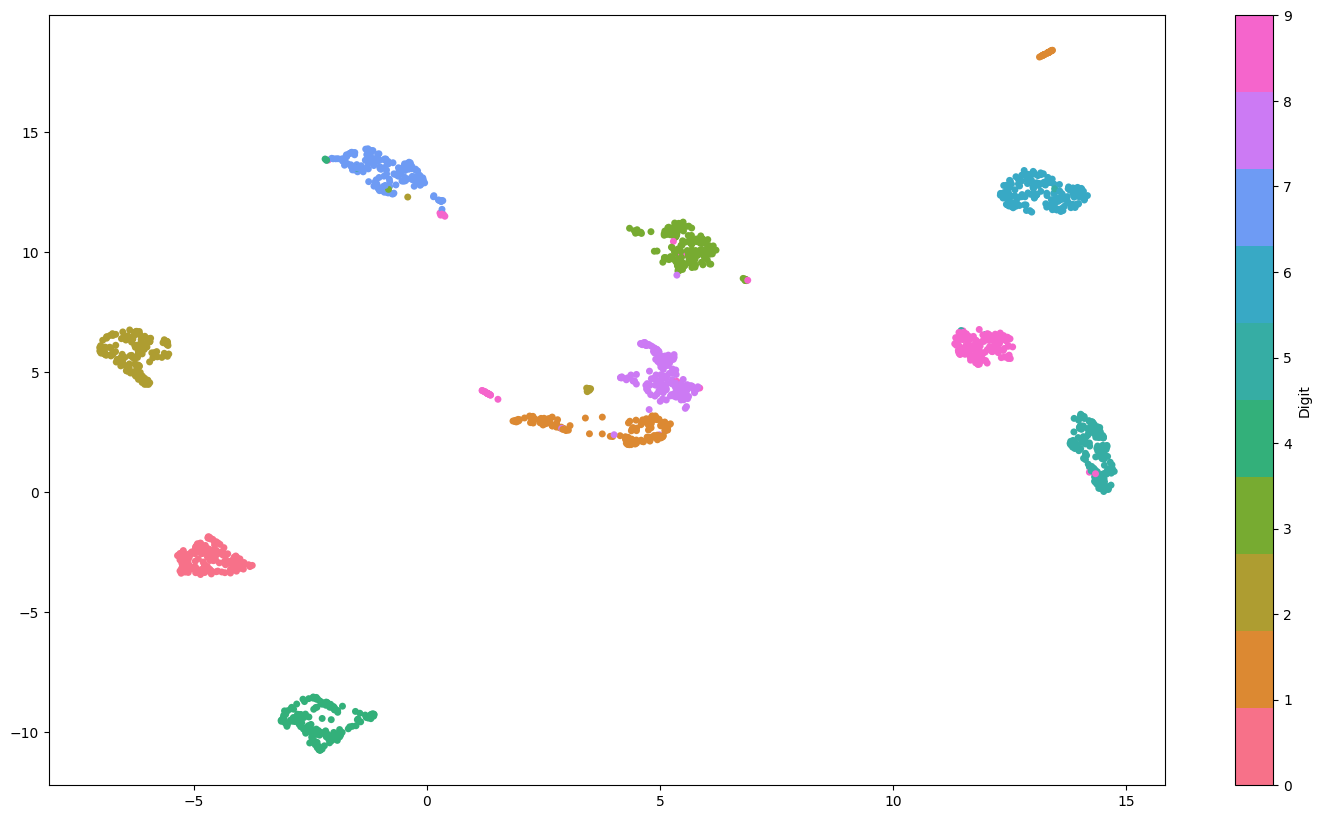

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(Z3[:,0], Z3[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')